<a href="https://colab.research.google.com/github/Raj-Vaghela/Patient-Readmission-Prediction-Google-Colab/blob/main/group17_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Building up a basic predictive model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Raj Vaghela/diabetic_data.csv', na_values='?' , low_memory=False) #read the data set and configuring ? as null values

In [4]:
for column in df:
        value_counts = df[column].value_counts() # Calculate value counts for the current column

        max_value = value_counts.idxmax()
        max_count = value_counts.max()
        max_percentage = (max_count / len(df)) * 100

        print(f"Column: {column}")
        print(f"Value: {max_value}, Percentage Occurrence: {max_percentage:.2f}%, Count: {max_count}\n")


Column: encounter_id
Value: 2278392, Percentage Occurrence: 0.00%, Count: 1

Column: patient_nbr
Value: 88785891, Percentage Occurrence: 0.04%, Count: 40

Column: race
Value: Caucasian, Percentage Occurrence: 74.78%, Count: 76099

Column: gender
Value: Female, Percentage Occurrence: 53.76%, Count: 54708

Column: age
Value: [70-80), Percentage Occurrence: 25.62%, Count: 26068

Column: weight
Value: [75-100), Percentage Occurrence: 1.31%, Count: 1336

Column: admission_type_id
Value: 1, Percentage Occurrence: 53.05%, Count: 53990

Column: discharge_disposition_id
Value: 1, Percentage Occurrence: 59.19%, Count: 60234

Column: admission_source_id
Value: 7, Percentage Occurrence: 56.50%, Count: 57494

Column: time_in_hospital
Value: 3, Percentage Occurrence: 17.45%, Count: 17756

Column: payer_code
Value: MC, Percentage Occurrence: 31.88%, Count: 32439

Column: medical_specialty
Value: InternalMedicine, Percentage Occurrence: 14.38%, Count: 14635

Column: num_lab_procedures
Value: 1, Percen

In [5]:
print(df.describe())
print('\nshape of original data:',df.shape)

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [6]:
df.drop(columns=['encounter_id'], inplace = True) #dropping encounter ID

In [7]:
# calculating missing values in a col and its %
missingValues = df.isnull().sum()
missingValues = missingValues[missingValues>0]
missingPercentage = (missingValues/len(df))*100

missingInfo = pd.DataFrame({'Missing Values': missingValues, 'Missing Percentage': missingPercentage})
print(missingInfo)
print('\nShape after dropping encounter_id:',df.shape)

                   Missing Values  Missing Percentage
race                         2273            2.233555
weight                      98569           96.858479
payer_code                  40256           39.557416
medical_specialty           49949           49.082208
diag_1                         21            0.020636
diag_2                        358            0.351787
diag_3                       1423            1.398306

Shape after dropping encounter_id: (101766, 49)


In [8]:
# setting readmitted data as per requirement, which is to predict if for readmission under 30 (days)
df['readmitted'] = df['readmitted'].replace({'<30':1, '>30':0, 'NO':0}, )
unique_values = df['readmitted'].unique()
print(unique_values)

[0 1]


In [9]:
columns_to_drop_from_ProblemStatement = ['repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

col_with_over_90perc_MisVal = missingPercentage[missingPercentage>90].index.tolist()

columns_to_drop = columns_to_drop_from_ProblemStatement + col_with_over_90perc_MisVal

df.drop(columns=columns_to_drop, inplace=True)
print('\nShape of data after dropping cols mentioned in Problem Statement and cols with more than 90% missing values')
print(df.shape)


Shape of data after dropping cols mentioned in Problem Statement and cols with more than 90% missing values
(101766, 31)


In [10]:
# dropping rows with null values
df_without_null = df.dropna()
df_without_null.shape

(26755, 31)

In [11]:
print(df_without_null.select_dtypes(include=['int64', 'float64']).nunique().to_frame()) # printing numerics columns' number of unique values per col

                              0
patient_nbr               19437
admission_type_id             6
discharge_disposition_id     23
admission_source_id          14
time_in_hospital             14
num_lab_procedures          110
num_procedures                7
num_medications              75
number_outpatient            20
number_emergency             31
number_inpatient             17
number_diagnoses             13
readmitted                    2


Summary statistics for column 'patient_nbr':
count    2.675500e+04
mean     5.732865e+07
std      3.710987e+07
min      7.290000e+02
25%      2.425177e+07
50%      4.401274e+07
75%      9.230198e+07
max      1.893659e+08
Name: patient_nbr, dtype: float64
Variance :  1377142400434606.8


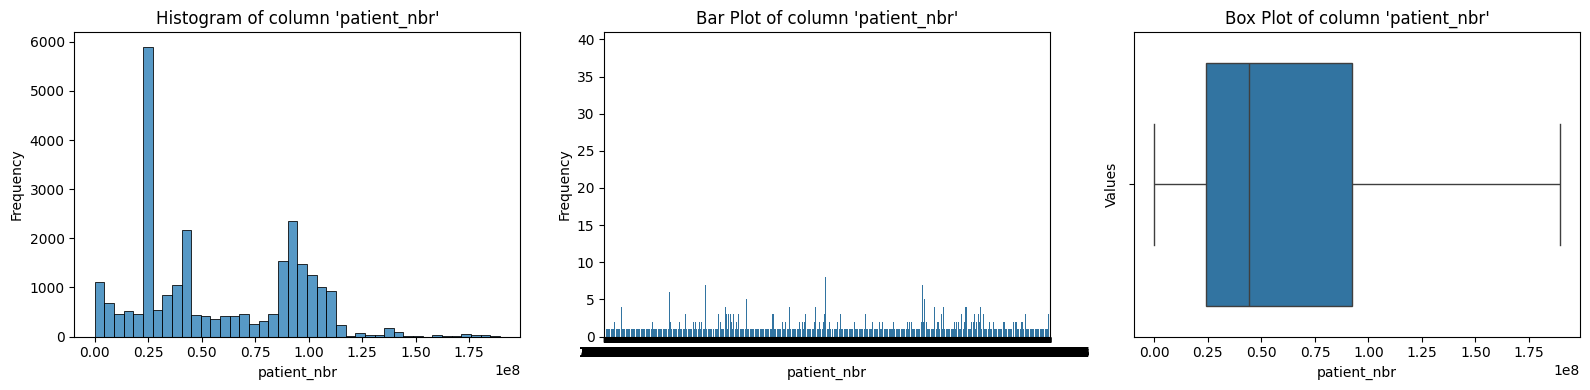

Summary statistics for column 'admission_type_id':
count    26755.000000
mean         2.019137
std          0.946664
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: admission_type_id, dtype: float64
Variance :  0.8961726117847992


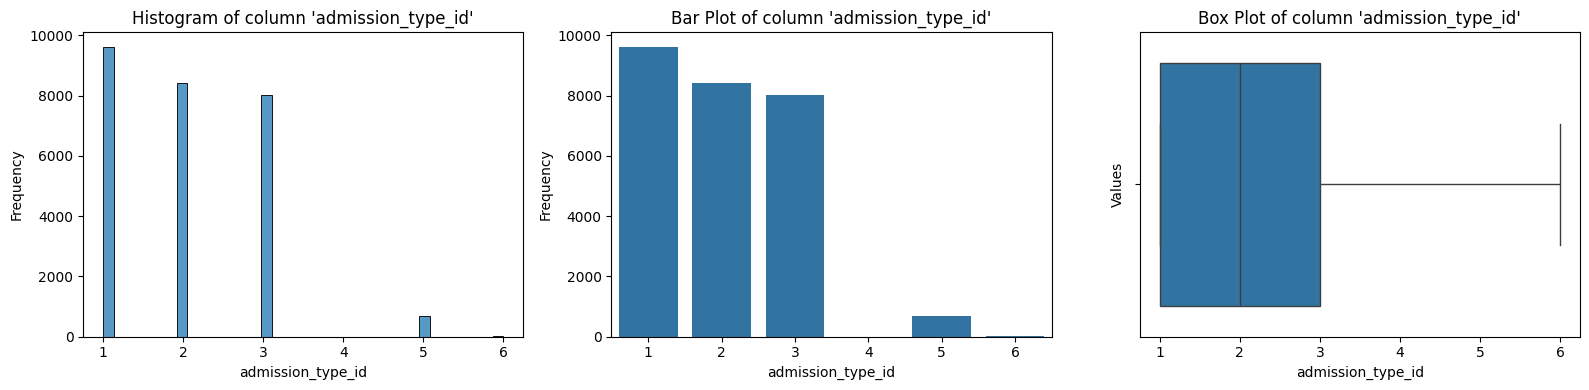

Summary statistics for column 'discharge_disposition_id':
count    26755.000000
mean         2.959821
std          4.327149
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         28.000000
Name: discharge_disposition_id, dtype: float64
Variance :  18.724220944114993


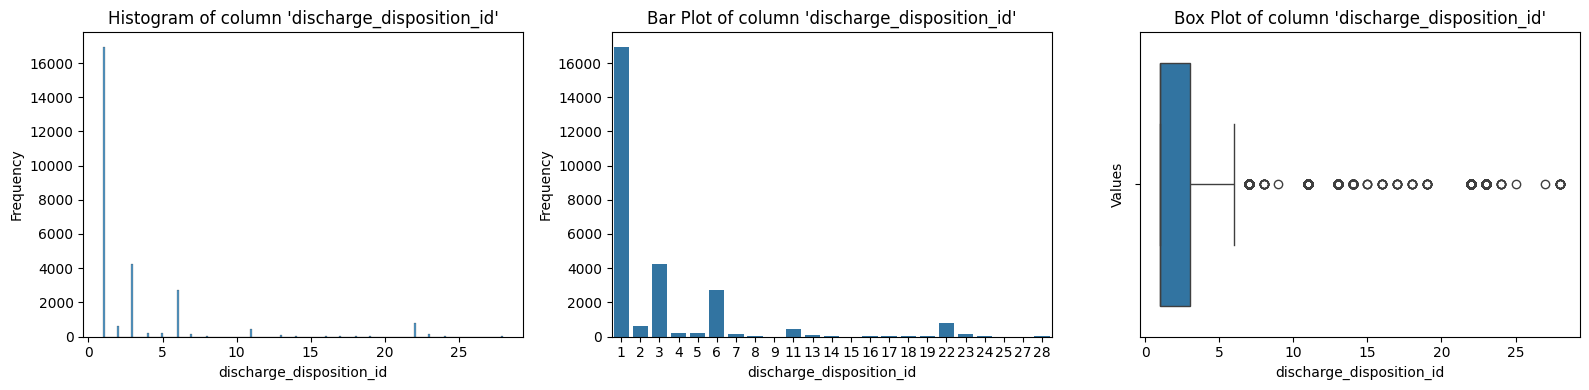

Summary statistics for column 'admission_source_id':
count    26755.000000
mean         4.972267
std          3.522615
min          1.000000
25%          1.000000
50%          7.000000
75%          7.000000
max         22.000000
Name: admission_source_id, dtype: float64
Variance :  12.408814458196035


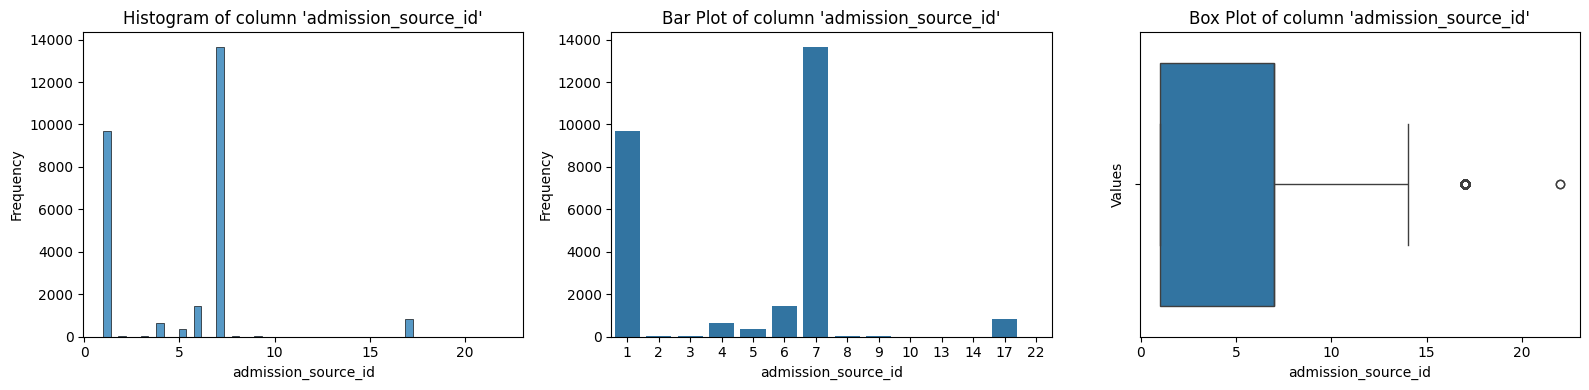

Summary statistics for column 'time_in_hospital':
count    26755.000000
mean         4.317922
std          2.949791
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64
Variance :  8.701269210463375


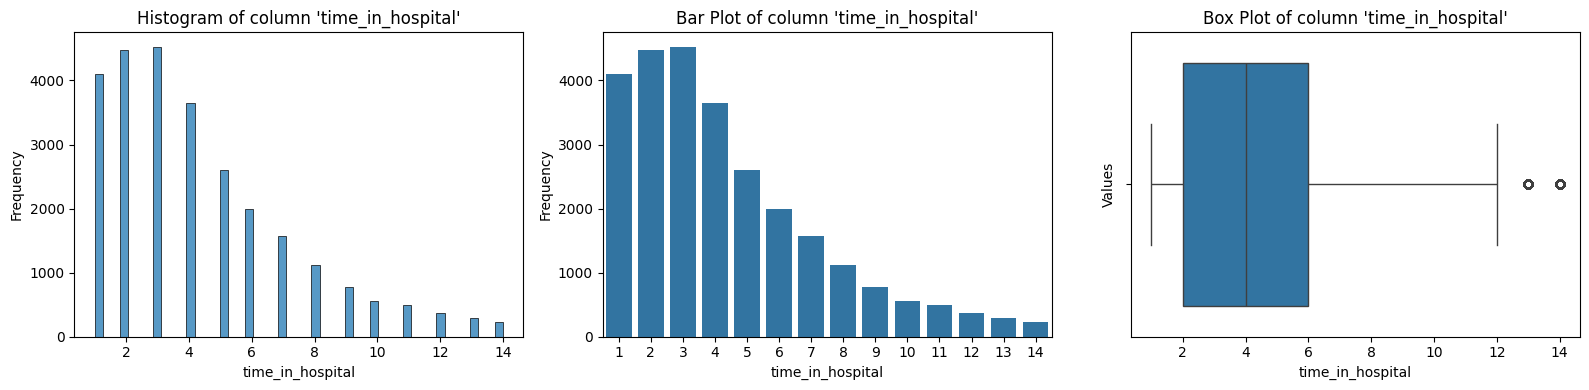

Summary statistics for column 'num_lab_procedures':
count    26755.000000
mean        40.756681
std         19.965546
min          1.000000
25%         29.000000
50%         42.000000
75%         54.000000
max        132.000000
Name: num_lab_procedures, dtype: float64
Variance :  398.62300939195205


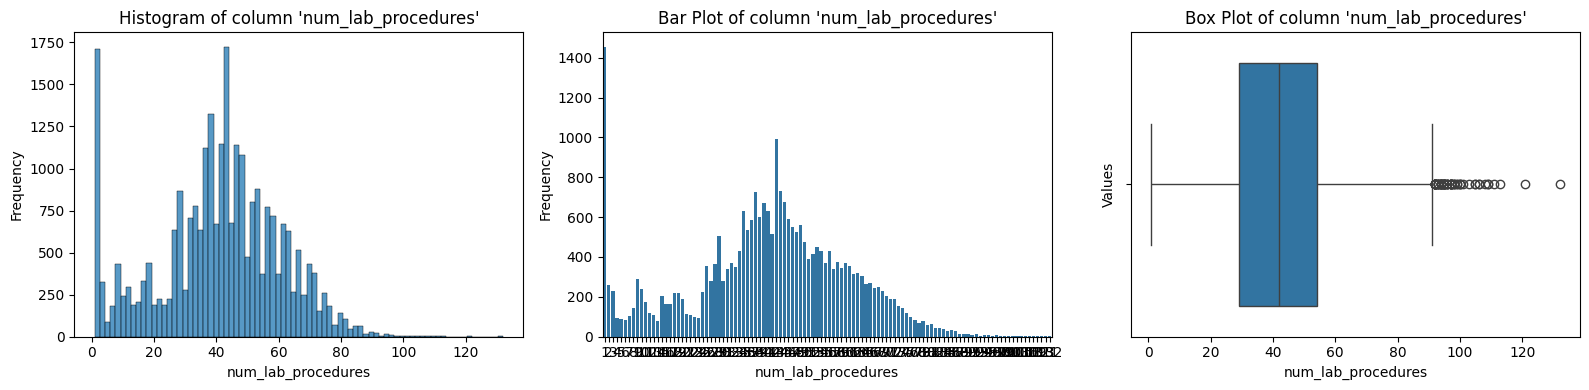

Summary statistics for column 'num_procedures':
count    26755.000000
mean         1.475575
std          1.749729
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: num_procedures, dtype: float64
Variance :  3.061552965523614


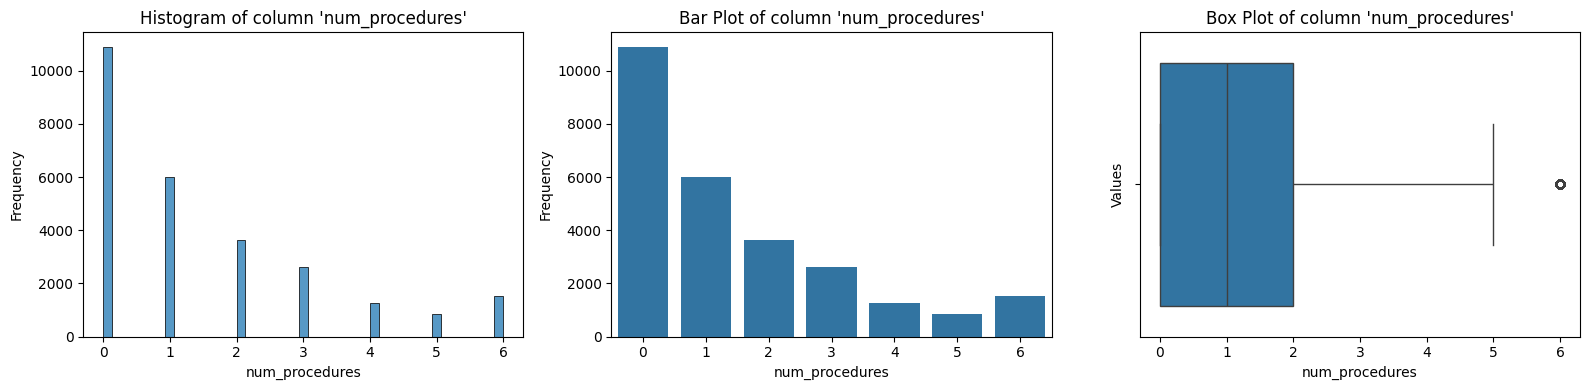

Summary statistics for column 'num_medications':
count    26755.000000
mean        16.246720
std          8.609362
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64
Variance :  74.12111832626861


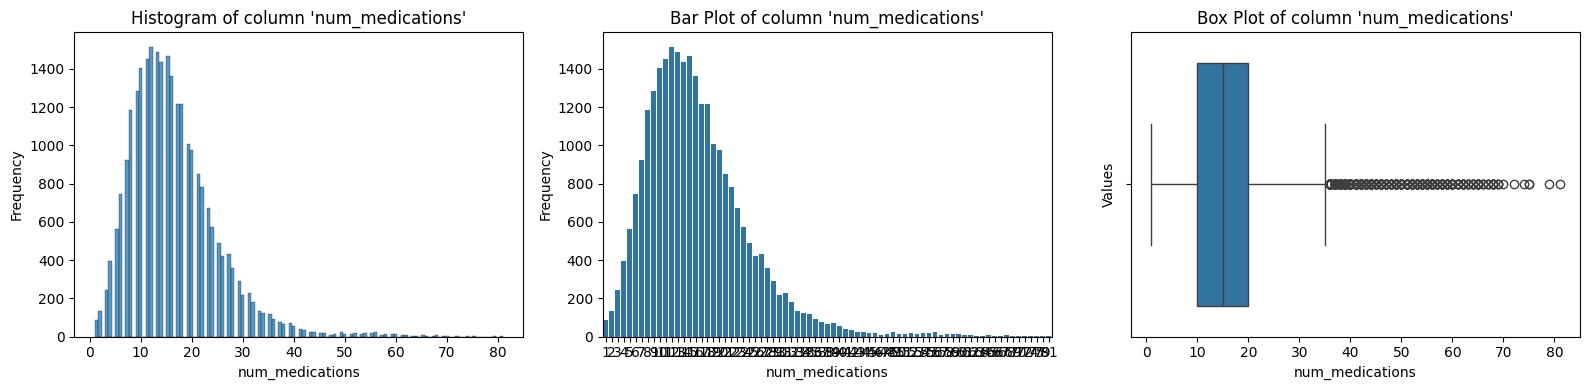

Summary statistics for column 'number_outpatient':
count    26755.000000
mean         0.290712
std          0.998707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         38.000000
Name: number_outpatient, dtype: float64
Variance :  0.9974150383526468


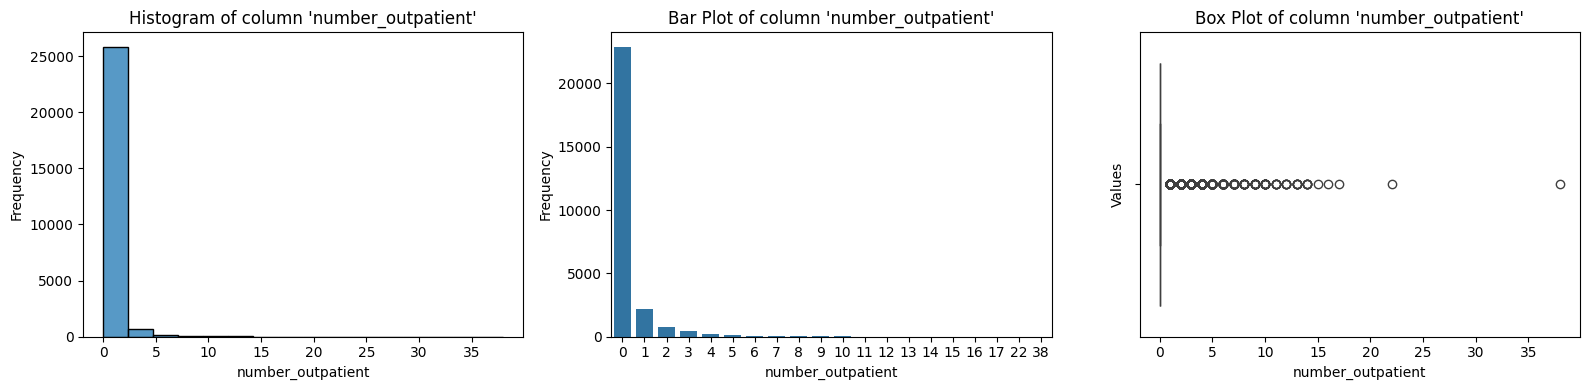

Summary statistics for column 'number_emergency':
count    26755.000000
mean         0.311755
std          1.437214
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: number_emergency, dtype: float64
Variance :  2.0655847017854505


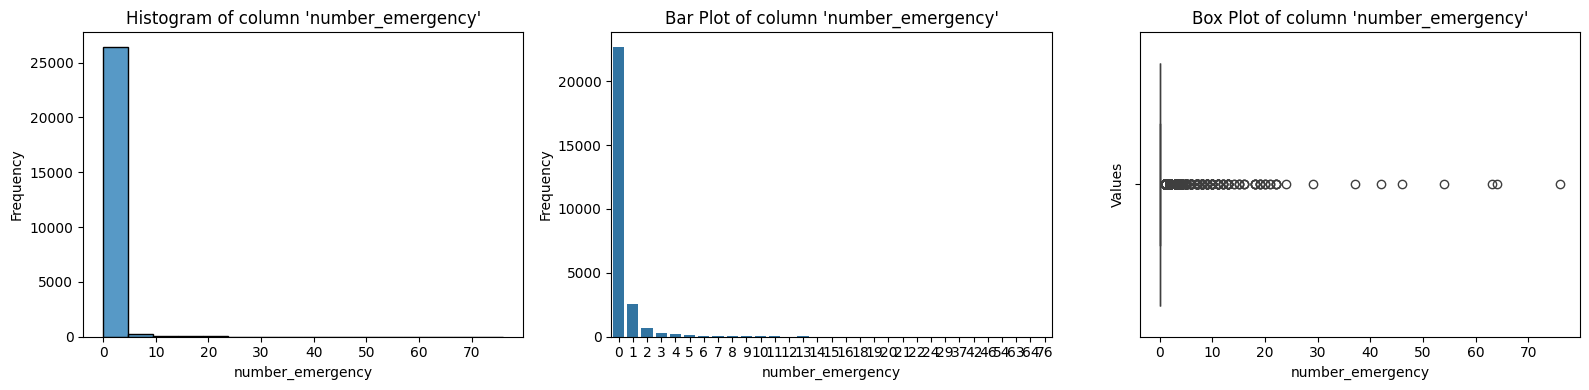

Summary statistics for column 'number_inpatient':
count    26755.000000
mean         0.670641
std          1.367311
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         16.000000
Name: number_inpatient, dtype: float64
Variance :  1.8695405736271644


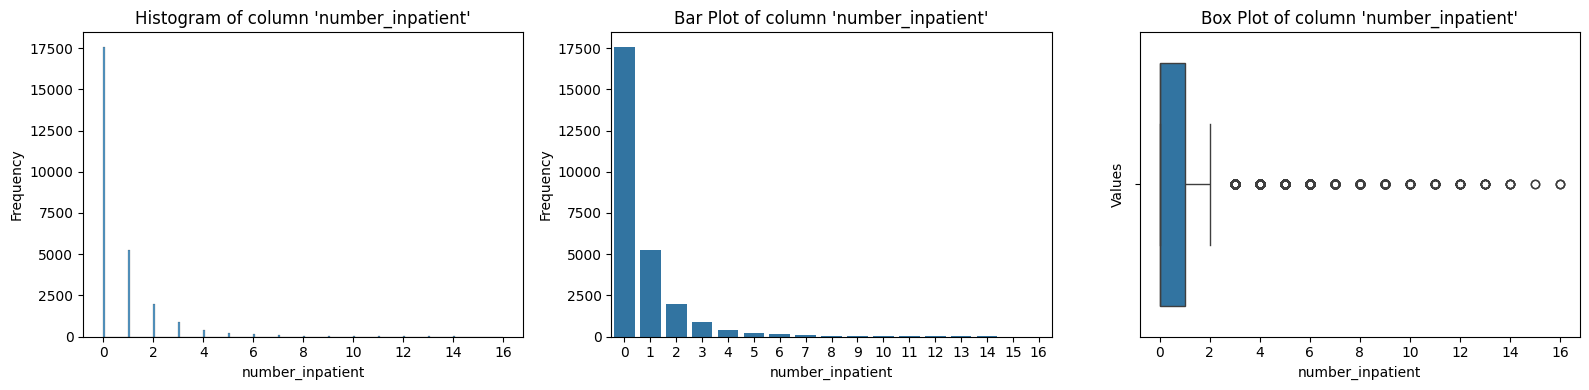

Summary statistics for column 'number_diagnoses':
count    26755.000000
mean         7.355522
std          1.895473
min          3.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64
Variance :  3.592818702825987


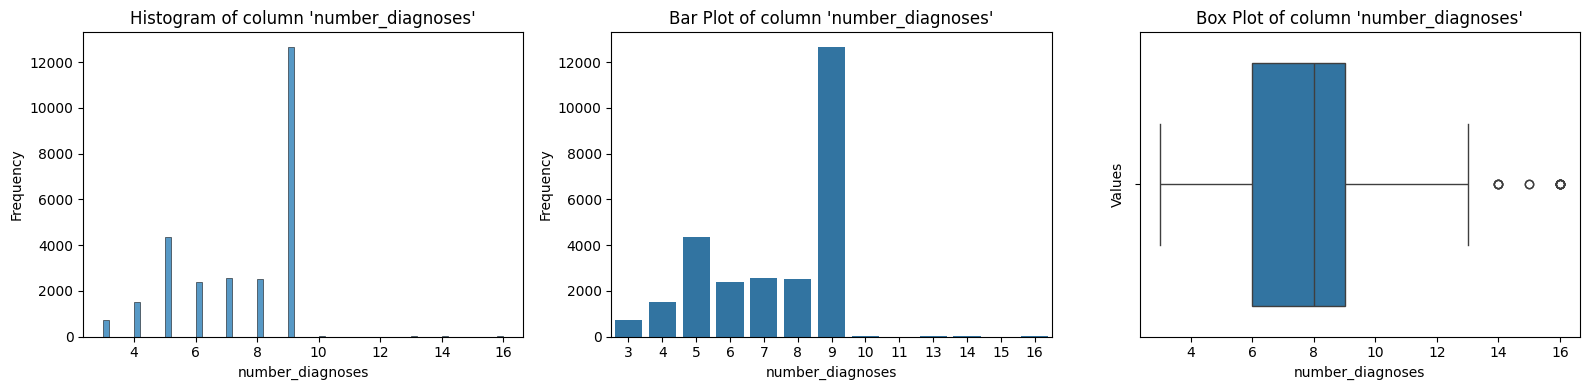

Summary statistics for column 'readmitted':
count    26755.000000
mean         0.106784
std          0.308844
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: readmitted, dtype: float64
Variance :  0.09538456844434366


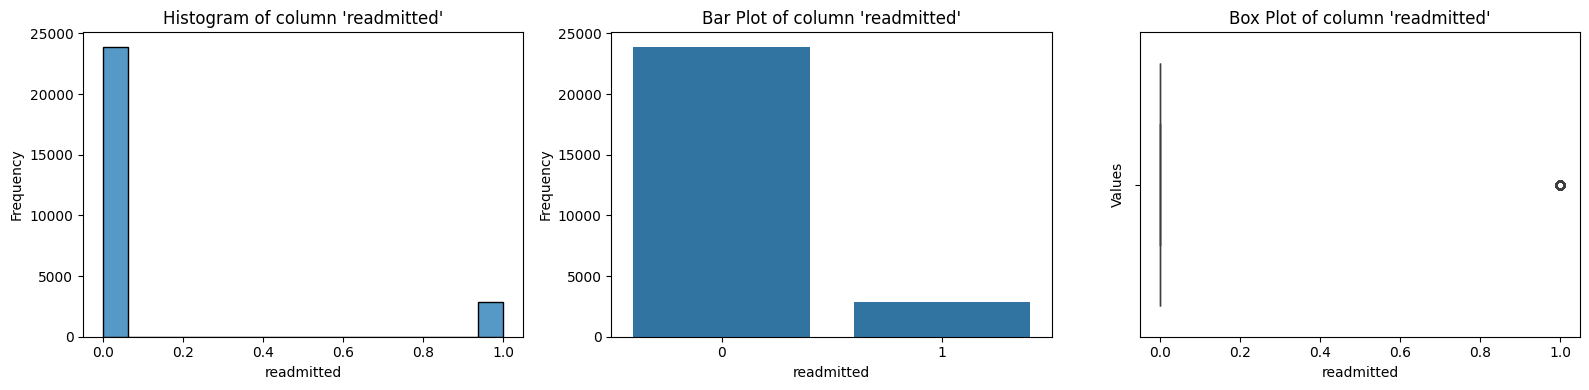

In [12]:
# plotting graphs and statestics of numeric columns to understand them better
for column in df_without_null.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Summary statistics for column '{column}':")
    print(df_without_null[column].describe())
    print('Variance : ', df_without_null[column].var())
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    # Histogram using Seaborn
    sns.histplot(data=df_without_null, x=column, ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f"Histogram of column '{column}'")

    # Bar plot using Seaborn
    value_counts = df_without_null[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f"Bar Plot of column '{column}'")

    # Box plot using Seaborn
    sns.boxplot(data=df_without_null, x=column, ax=axes[2])
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Values')
    axes[2].set_title(f"Box Plot of column '{column}'")

    plt.tight_layout()
    plt.show()


In [13]:
# List of columns for which you want to calculate the percentage of different individual values
cols_of_interest = ['number_inpatient','number_emergency','number_outpatient']
percentage_occurrences = {}

# Iterate through the columns of interest
for column in cols_of_interest:
    # Calculate value counts for the current column
    value_counts = df_without_null[column].value_counts()

    # Calculate total count for the column
    total_count = len(df_without_null)

    print(f"Column: {column}")
    # Iterate through unique values and print their occurrence percentage and count
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"Value: {value}, Percentage Occurrence: {percentage:.2f}%, Count: {count}")

    print()  # Add a newline between columns


#confirming the information from boxplots of this graphs as they showed long tails and had a lot of zero values

Column: number_inpatient
Value: 0, Percentage Occurrence: 65.72%, Count: 17583
Value: 1, Percentage Occurrence: 19.67%, Count: 5263
Value: 2, Percentage Occurrence: 7.40%, Count: 1981
Value: 3, Percentage Occurrence: 3.36%, Count: 900
Value: 4, Percentage Occurrence: 1.49%, Count: 398
Value: 5, Percentage Occurrence: 0.78%, Count: 209
Value: 6, Percentage Occurrence: 0.50%, Count: 134
Value: 7, Percentage Occurrence: 0.32%, Count: 86
Value: 8, Percentage Occurrence: 0.23%, Count: 62
Value: 9, Percentage Occurrence: 0.19%, Count: 51
Value: 11, Percentage Occurrence: 0.10%, Count: 26
Value: 10, Percentage Occurrence: 0.09%, Count: 25
Value: 12, Percentage Occurrence: 0.06%, Count: 16
Value: 13, Percentage Occurrence: 0.04%, Count: 10
Value: 14, Percentage Occurrence: 0.02%, Count: 6
Value: 16, Percentage Occurrence: 0.01%, Count: 3
Value: 15, Percentage Occurrence: 0.01%, Count: 2

Column: number_emergency
Value: 0, Percentage Occurrence: 84.86%, Count: 22705
Value: 1, Percentage Occurre

In [14]:
df_without_null.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change              

In [15]:
df_without_null.select_dtypes(include=['int64', 'float64']).columns

Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted'],
      dtype='object')

In [16]:
# Removing Outliers using IQR method for non categorical numeric columns

def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

df_no_outliers = df_without_null.copy()

for column in df_no_outliers.select_dtypes(include=['int64', 'float64']).columns:
    if column not in ['readmitted','number_outpatient','number_emergency','number_inpatient',
                      'admission_type_id','discharge_disposition_id','admission_source_id']: #since all these numbers have very long tails and IDs are categorical data
        outliers = identify_outliers_iqr(df_no_outliers[column])
        num_outliers = outliers.sum()
        df_no_outliers = df_no_outliers.loc[~outliers]
        print(f"Total outliers in '{column}': {num_outliers}")
        print(f"-outliers from '{column}' gave shape {df_no_outliers.shape}")



Total outliers in 'patient_nbr': 0
-outliers from 'patient_nbr' gave shape (26755, 31)
Total outliers in 'time_in_hospital': 517
-outliers from 'time_in_hospital' gave shape (26238, 31)
Total outliers in 'num_lab_procedures': 61
-outliers from 'num_lab_procedures' gave shape (26177, 31)
Total outliers in 'num_procedures': 1445
-outliers from 'num_procedures' gave shape (24732, 31)
Total outliers in 'num_medications': 424
-outliers from 'num_medications' gave shape (24308, 31)
Total outliers in 'number_diagnoses': 9
-outliers from 'number_diagnoses' gave shape (24299, 31)


In [17]:
df_no_outliers.shape

(24299, 31)

In [18]:
df_no_outliers.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change              

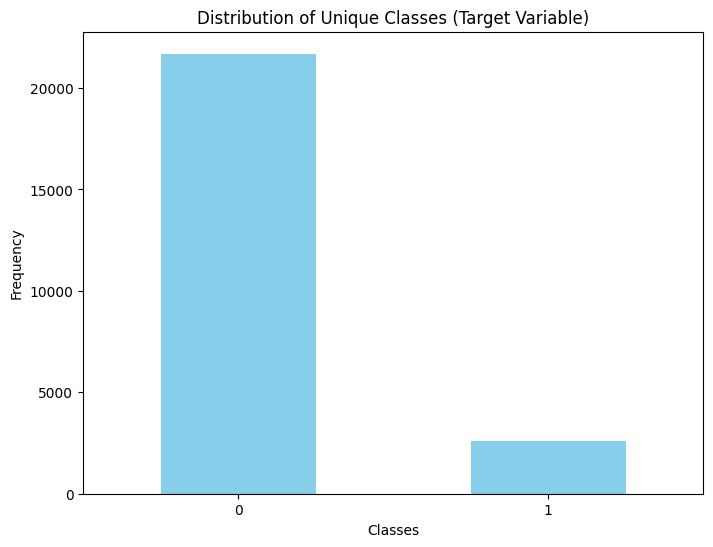

In [19]:
class_counts = df_no_outliers['readmitted'].value_counts()

# Plot the distribution of unique classes of Readmitted column
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unique Classes (Target Variable)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

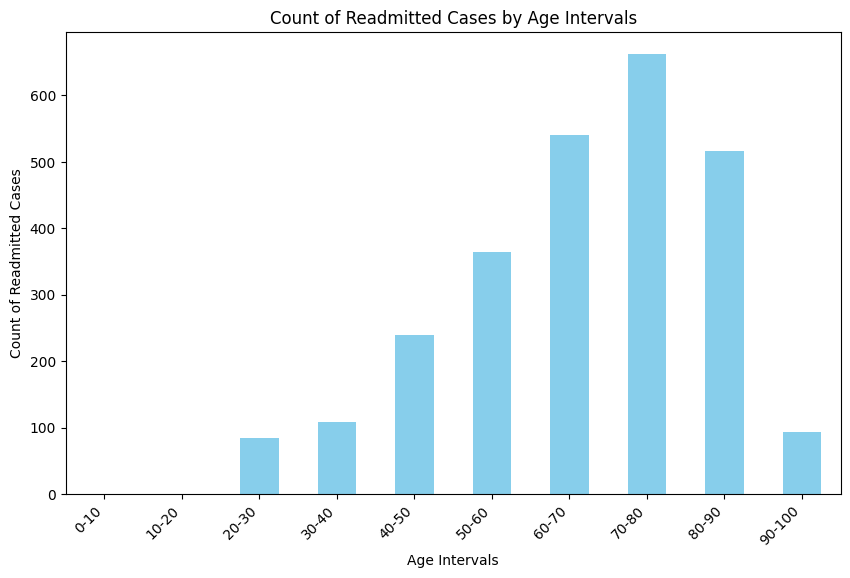

In [20]:
age_intervals = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Group data by age intervals and count readmitted cases
readmitted_counts = df_no_outliers.groupby('age')['readmitted'].sum()

# Convert age intervals to corresponding labels
readmitted_counts.index = age_labels

# Plot the count of readmitted cases against age intervals
plt.figure(figsize=(10, 6))
readmitted_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Intervals')
plt.ylabel('Count of Readmitted Cases')
plt.title('Count of Readmitted Cases by Age Intervals')
plt.xticks(rotation=45, ha='right')
plt.show()



<Figure size 1400x400 with 0 Axes>

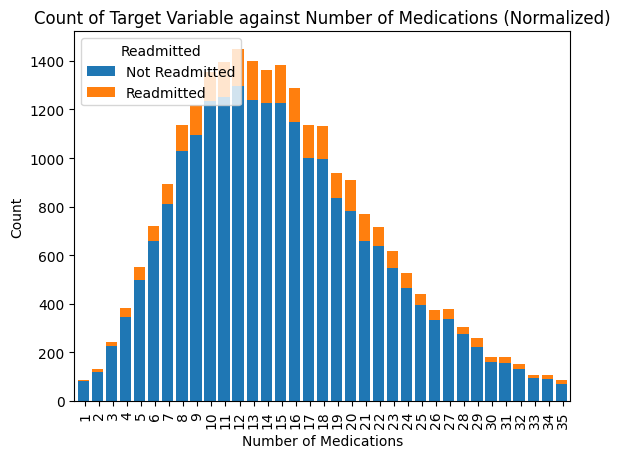

In [21]:
target_counts = df_no_outliers.groupby('num_medications')['readmitted'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14,4))
bars = target_counts.plot(kind='bar', stacked=True, width=0.8, align='center')  # Set align='center' to align bars to tick labels

# Get the current positions of the bars
positions = np.arange(len(target_counts))

# Manually adjust the positions of the bars
plt.xticks(positions + 0.2 * (len(target_counts.columns) - 1) / 2, target_counts.index)
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Count of Target Variable against Number of Medications (Normalized)')
plt.legend(title='Readmitted', loc='upper left', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=90)
plt.show()


<Figure size 1400x600 with 0 Axes>

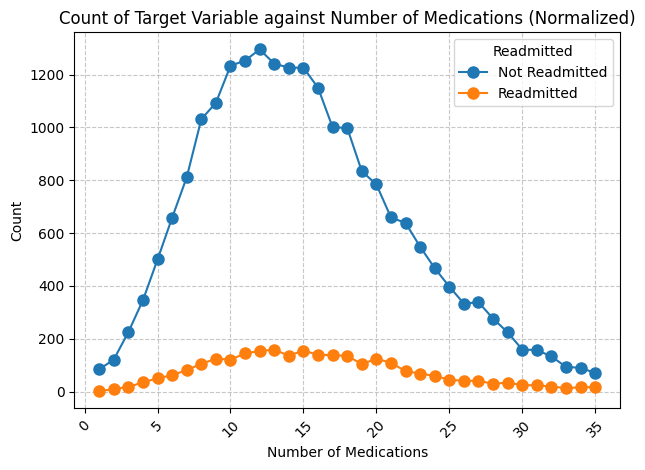

In [22]:
target_counts = df_no_outliers.groupby('num_medications')['readmitted'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
target_counts.plot(kind='line', marker='o', markersize=8)
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Count of Target Variable against Number of Medications (Normalized)')
plt.legend(title='Readmitted', loc='upper right', labels=['Not Readmitted', 'Readmitted'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


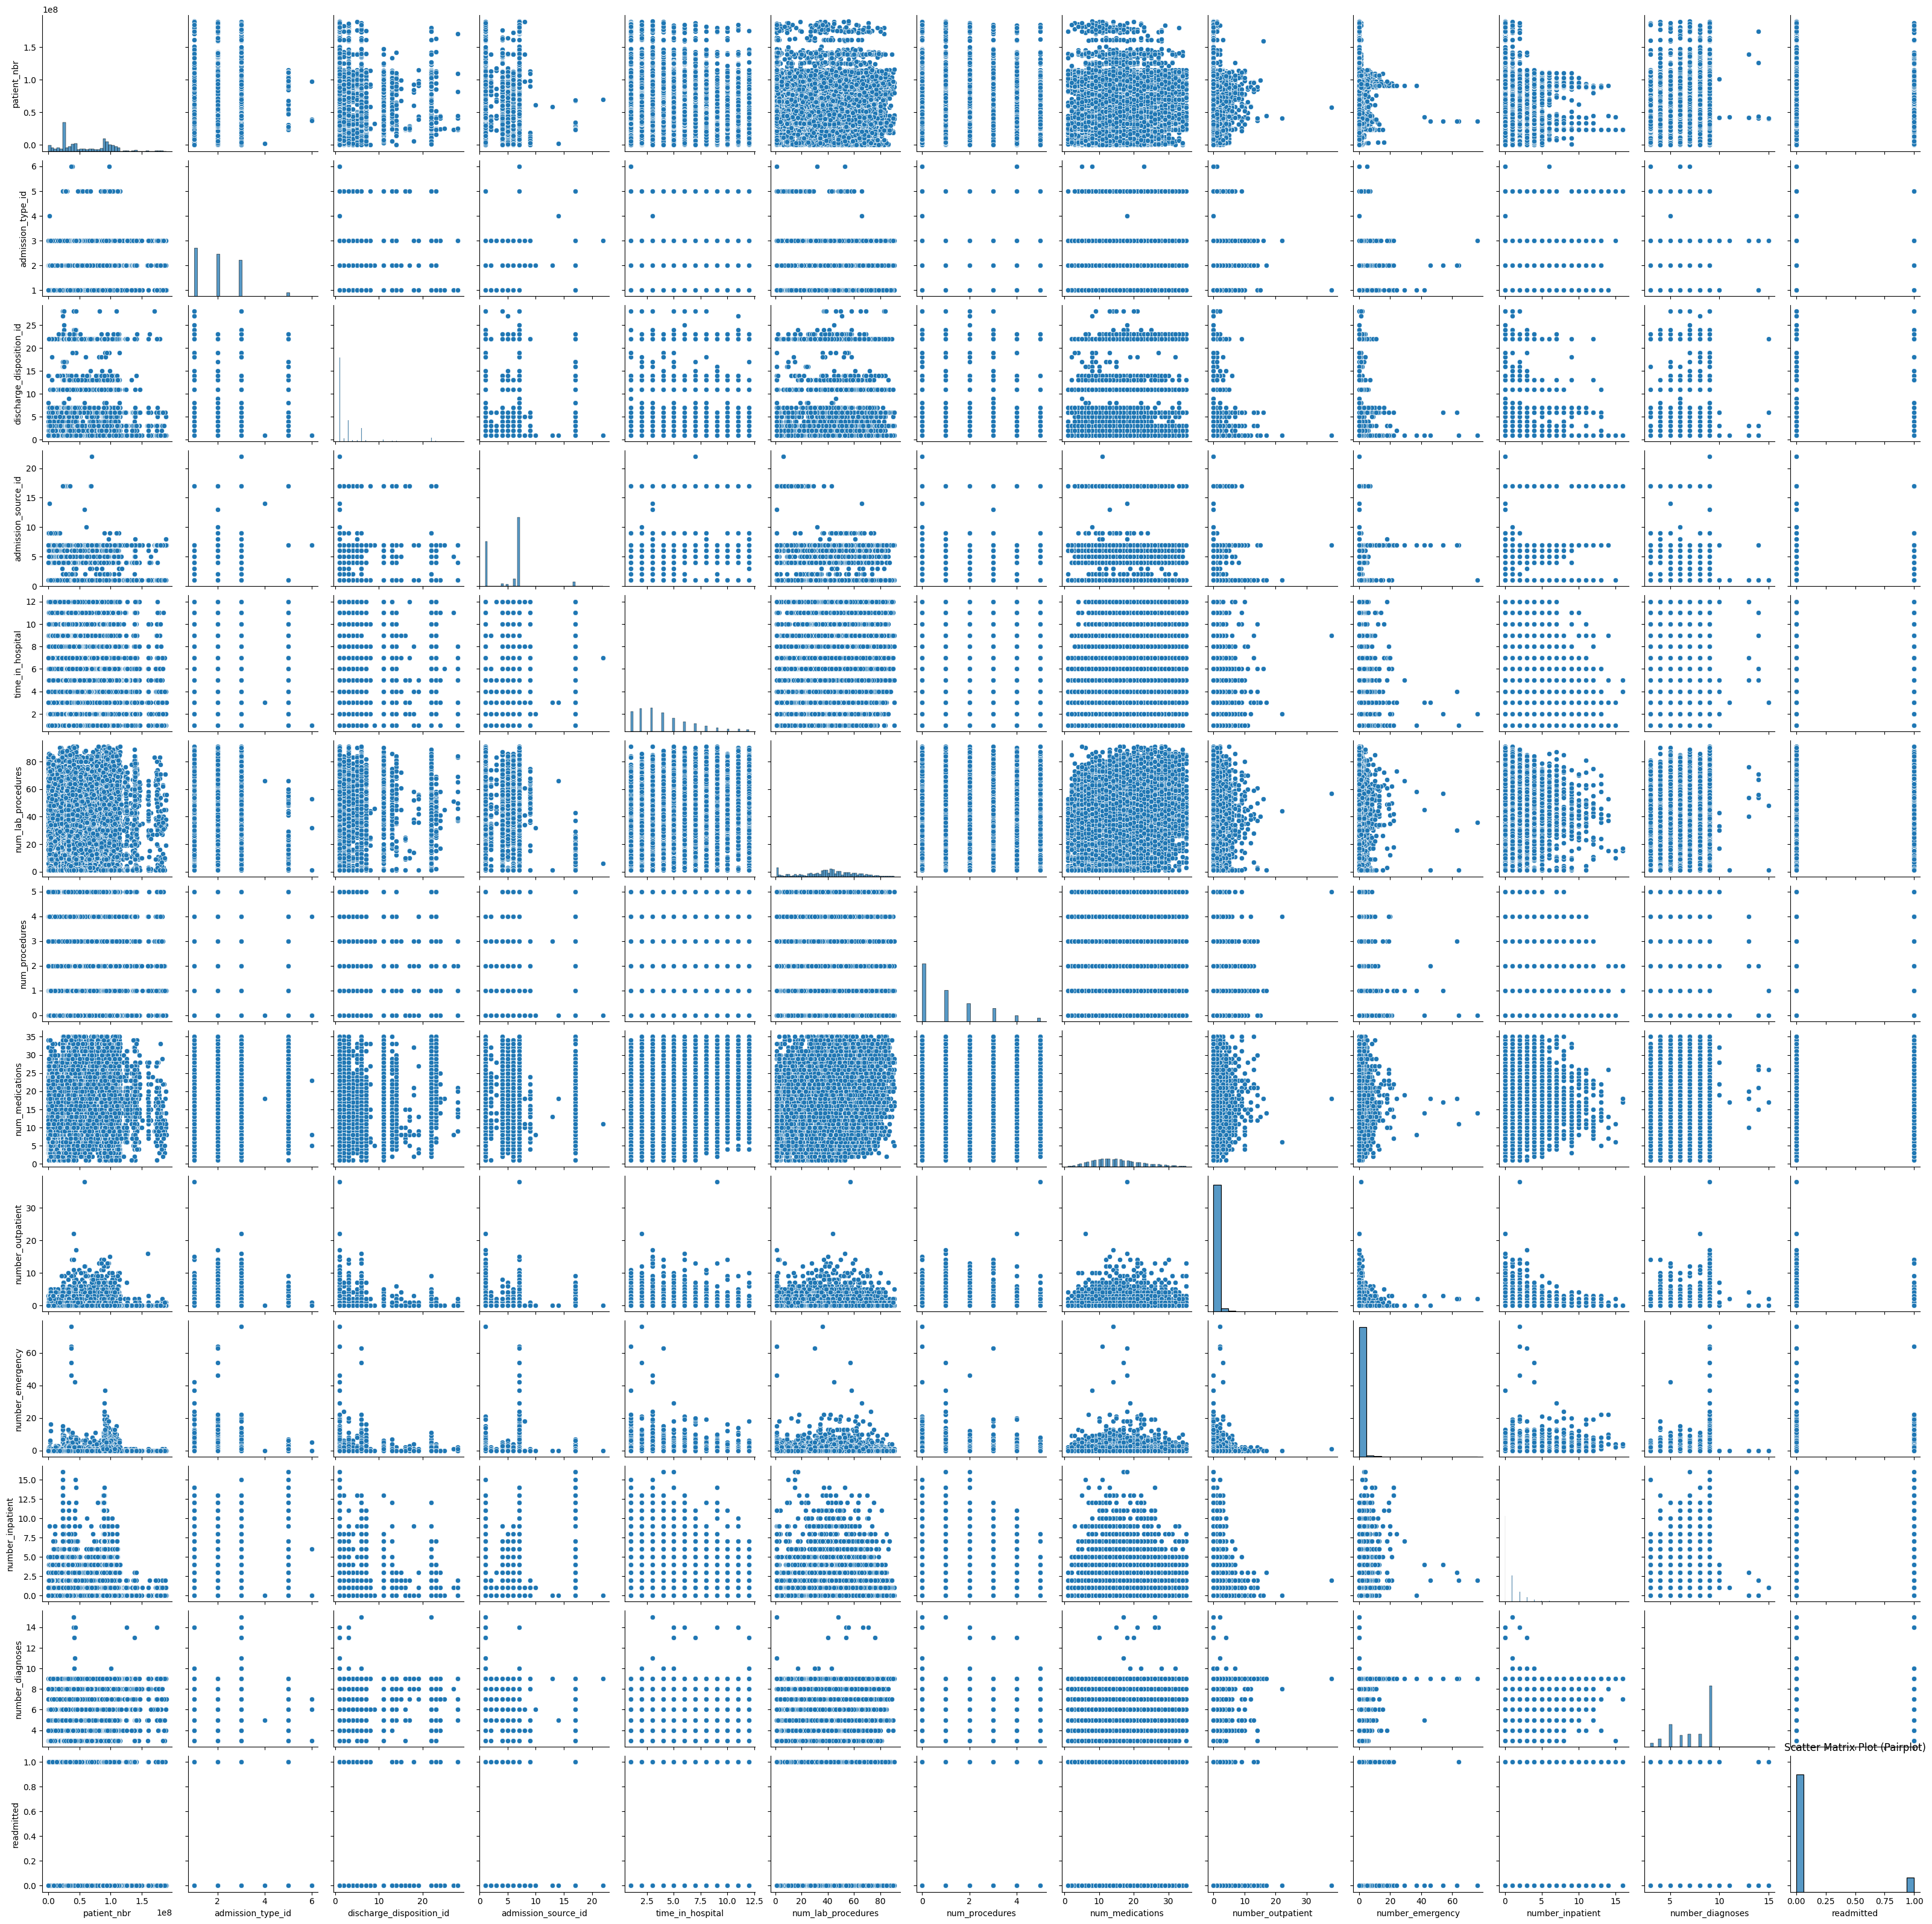

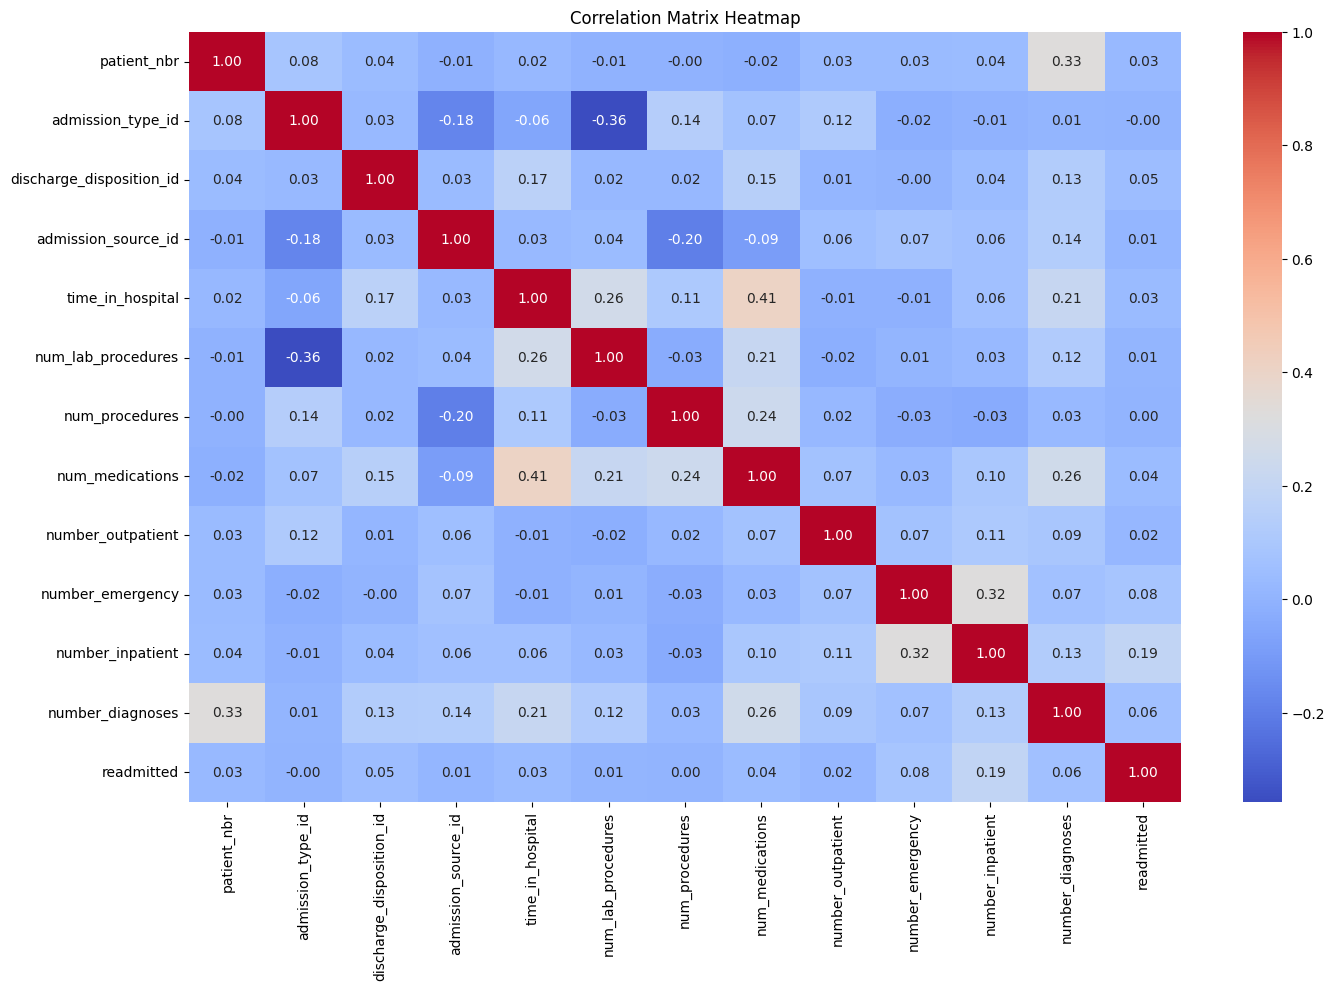

In [23]:
import seaborn as sns
sns.pairplot(df_no_outliers)
plt.title('Scatter Matrix Plot (Pairplot)')
plt.show()

correlation_matrix = df_no_outliers.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [24]:
df_no_outliers.shape

(24299, 31)

In [25]:
print(df_no_outliers.columns)

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [26]:
print(df_no_outliers.select_dtypes(include=['int64', 'float64']).columns)

Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted'],
      dtype='object')


In [27]:
# Normalizing necessary columns
col_to_normalize = ['number_inpatient','num_medications','num_procedures','num_lab_procedures','time_in_hospital',
                    'number_diagnoses','number_outpatient','number_emergency']

def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())
df_no_outliers[col_to_normalize] = df_no_outliers[col_to_normalize].apply(min_max_scaling)

# print(df_no_outliers.head(10))
from IPython.display import display
display(df_no_outliers.head(10))


patient_nbr       race  gender       age  admission_type_id  \
20446     20123568  Caucasian  Female   [70-80)                  1   
20737     20377854  Caucasian  Female   [60-70)                  2   
20824     20408121  Caucasian  Female  [90-100)                  1   
21083     20542797  Caucasian    Male   [70-80)                  1   
23879      7239654  Caucasian  Female   [70-80)                  1   
23922     15466212  Caucasian    Male   [70-80)                  1   
24028      2509965  Caucasian    Male   [50-60)                  2   
24090     25521759  Caucasian    Male   [70-80)                  5   
24091     23464296  Caucasian    Male   [70-80)                  5   
24103     23748399  Caucasian    Male   [80-90)                  5   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
20446                        22                    7          0.545455   
20737                         1                    1          0.181818   
20824                         1                    7          0.272727   
21083                         2                    7          0.818182   
23879                         3                    6          1.000000   
23922                         3                    6          1.000000   
24028                         1                    1          0.454545   
24090                         6                   17          0.181818   
24091                         2                   17          0.727273   
24103                         2                   17          0.181818   

      payer_code           medical_specialty  ...  A1Cresult  metformin  \
20446         MC  Orthopedics-Reconstructive  ...       None         No   
20737         MC                  Nephrology  ...       None         No   
20824         MC            Emergency/Trauma  ...       None         No   
21083         MC            InternalMedicine  ...       None     Steady   
23879         UN            InternalMedicine  ...         >8         No   
23922         MC            InternalMedicine  ...       None         No   
24028         BC            InternalMedicine  ...       None     Steady   
24090         MC      Family/GeneralPractice  ...       None         No   
24091         MC                  Psychiatry  ...       None         No   
24103         MC                  Cardiology  ...       None         No   

       glipizide  glyburide  pioglitazone  rosiglitazone insulin change  \
20446         No         No            Up             No  Steady     Ch   
20737         No         No            No             No  Steady     No   
20824         No         No            No             No      No     No   
21083         No         No            No             No  Steady     Ch   
23879         No         No            No             No  Steady     No   
23922         No         No            No             No      No     No   
24028         No     Steady            No             No      No     Ch   
24090         No         No        Steady             No  Steady     Ch   
24091         No         No            No             No      No     No   
24103         No         No            No             No      No     No   

      diabetesMed  readmitted  
20446         Yes           0  
20737         Yes           0  
20824         Yes           0  
21083         Yes           0  
23879         Yes           0  
23922          No           0  
24028         Yes           0  
24090         Yes           0  
24091          No           1  
24103          No           0  

[10 rows x 31 columns]

In [28]:
df_no_outliers.dtypes

patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital            float64
payer_code                   object
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
glipizide                    object
glyburide                    object
pioglitazone                 object
rosiglitazone                object
insulin                     

In [29]:
# Performing necessary encoding to appropriate columns

categorical_cols_forLabelEncoding = ['diabetesMed','A1Cresult','max_glu_serum','age']
categorical_cols_forOneHotEncoding = ['medical_specialty','payer_code','admission_type_id','discharge_disposition_id','admission_source_id',
                                      'race','gender','diag_1','diag_2','diag_3','change','insulin','rosiglitazone','pioglitazone','glyburide','glipizide','metformin',]
# Label encoding
for feature in categorical_cols_forLabelEncoding:
    df_no_outliers[feature] = pd.factorize(df_no_outliers[feature])[0]

# One-hot encoding
df_no_outliers = pd.get_dummies(df_no_outliers, columns=categorical_cols_forOneHotEncoding, drop_first=True)


print('After Encoding shape :',df_no_outliers.shape)

After Encoding shape : (24299, 1853)


In [30]:
# Trying to print columns without any numeric datatype , basically checking if there are any columns with object or other data type in it

cols_without_specified_dtype = [col for col in df_no_outliers.columns if df_no_outliers[col].dtype not in ['int64', 'float64', 'uint8']]

# Print the columns
print("Columns without 'int64', 'float64', or 'uint8' data types:")
if len(cols_without_specified_dtype) > 0:
    for col in cols_without_specified_dtype:
        print(col)
else:
    print("None as all columns have 'int64', 'float64', or 'uint8' data types.")


Columns without 'int64', 'float64', or 'uint8' data types:
None as all columns have 'int64', 'float64', or 'uint8' data types.


In [31]:
print('unique number values in readmitted:', df_no_outliers['readmitted'].nunique() )
print('unique number values in patient_nbr:', df_no_outliers['patient_nbr'].nunique() )

unique number values in readmitted: 2
unique number values in patient_nbr: 17819


## **Model Building**



---
**Logistic Regression Model : using train, test and validation data split**


---



In [35]:
# dropping only patient number as it has too many unique values in it and
# not dropping any other col as they all do not have very high correlation with each other or even target variable

X = df_no_outliers.drop(columns=['readmitted','patient_nbr'])
Y = df_no_outliers['readmitted']
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#split the data into 70 training data and 30% temp data
#split the temp data into 50-50 as test and validation data
#achieved 70-15-15 split of train,test and validation

X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=10000) # using Logistic Regression as it is indicated to use linear model in problem statement
model.fit(X_train, y_train)

print("Using Logistic Regression on the processed data ")
print("-"*100)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)
print("Performance Metrics on Validation Set:")
print("Accuracy %:", val_accuracy*100)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)
print("ROC AUC Score:", val_roc_auc)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nPerformance Metrics on Test Set:")
print("Accuracy %:", test_accuracy*100)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')*100
print("\nCross-Validation Scores:")
print(cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Using Logistic Regression on the processed data 
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Accuracy %: 89.38271604938272
Precision: 0.41379310344827586
Recall: 0.031413612565445025
F1 Score: 0.058394160583941604
ROC AUC Score: 0.5131018415263633

Performance Metrics on Test Set:
Accuracy %: 90.01371742112482
Precision: 0.48484848484848486
Recall: 0.0440771349862259
F1 Score: 0.0808080808080808
ROC AUC Score: 0.519448683276172

Cross-Validation Scores:
[88.88888889 89.15343915 88.94767784 88.85949442 89.15024993]
Average CV Accuracy: 88.9999500440874




---

Balancing data using : UnderSampling**


---



In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train_temp, y_train_temp)


X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print("Using Logistic Regression on the processed undersampled data ")
print("-"*100)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Performance Metrics on Validation Set:")
print("Accuracy %:", val_accuracy*100)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)
print("ROC AUC Score:", val_roc_auc)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nPerformance Metrics on Test Set:")
print("Accuracy %:", test_accuracy*100)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy') * 100
print("\nCross-Validation Scores:")
print(cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Using Logistic Regression on the processed undersampled data 
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Accuracy %: 58.497316636851515
Precision: 0.5576208178438662
Recall: 0.5703422053231939
F1 Score: 0.5639097744360902
ROC AUC Score: 0.5841575891480835

Performance Metrics on Test Set:
Accuracy %: 57.066189624329155
Precision: 0.5679442508710801
Recall: 0.5842293906810035
F1 Score: 0.5759717314487632
ROC AUC Score: 0.5706861239119304

Cross-Validation Scores:
[55.76407507 57.85234899 60.67114094 60.53691275 55.83892617]
Average CV Accuracy: 58.132680785216905




---

**Balancing data using : Oversampling**


---



In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_temp, y_train_temp)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print("Using Logistic Regression on the processed oversampled data ")
print("-"*100)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Performance Metrics on Validation Set:")
print("Accuracy %:", val_accuracy*100)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)
print("ROC AUC Score:", val_roc_auc)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nPerformance Metrics on Test Set:")
print("Accuracy %:", test_accuracy*100)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy') * 100
print("\nCross-Validation Scores:")
print(cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Using Logistic Regression on the processed oversampled data 
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Accuracy %: 71.0387323943662
Precision: 0.6971027216856892
Recall: 0.7172538392050587
F1 Score: 0.7070347284060553
ROC AUC Score: 0.7105582500746324

Performance Metrics on Test Set:
Accuracy %: 71.01672535211267
Precision: 0.709776413853573
Recall: 0.7119613016710642
F1 Score: 0.7108671789242591
ROC AUC Score: 0.7101656728619639

Cross-Validation Scores:
[70.39115366 70.60571051 72.15252559 71.65731264 70.94750743]
Average CV Accuracy: 71.1508419655276


# Part 2 : Improved Model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df2 = pd.read_csv('/content/drive/My Drive/Raj Vaghela/diabetic_data.csv', na_values='?' , low_memory=False)

In [9]:
print(df2.describe())
print('\nshape of original data:',df2.shape)

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [10]:
for column in df2.columns:
    value_counts = df2[column].value_counts() # Calculate value counts for the current column
    total_count = len(df2) # Calculate total count for the column

    max_value = value_counts.idxmax()
    max_count = value_counts.max()
    max_percentage = (max_count / total_count) * 100

    unique_values_count = df2[column].nunique()  # Count number of unique values in the column

    print(f"Column: {column}")
    print(f"Value: {max_value}, Percentage Occurrence: {max_percentage:.2f}%, Occurance Count: {max_count}, Number of Unique Values: {unique_values_count}\n")


Column: encounter_id
Value: 2278392, Percentage Occurrence: 0.00%, Occurance Count: 1, Number of Unique Values: 101766

Column: patient_nbr
Value: 88785891, Percentage Occurrence: 0.04%, Occurance Count: 40, Number of Unique Values: 71518

Column: race
Value: Caucasian, Percentage Occurrence: 74.78%, Occurance Count: 76099, Number of Unique Values: 5

Column: gender
Value: Female, Percentage Occurrence: 53.76%, Occurance Count: 54708, Number of Unique Values: 3

Column: age
Value: [70-80), Percentage Occurrence: 25.62%, Occurance Count: 26068, Number of Unique Values: 10

Column: weight
Value: [75-100), Percentage Occurrence: 1.31%, Occurance Count: 1336, Number of Unique Values: 9

Column: admission_type_id
Value: 1, Percentage Occurrence: 53.05%, Occurance Count: 53990, Number of Unique Values: 8

Column: discharge_disposition_id
Value: 1, Percentage Occurrence: 59.19%, Occurance Count: 60234, Number of Unique Values: 26

Column: admission_source_id
Value: 7, Percentage Occurrence: 5

In [11]:
df2['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [12]:
value_to_check = 'Unknown/Invalid' #checking since it occured in previous step that there is third value in gender column
occurrences = df2['gender'].value_counts().get(value_to_check, 0)
print(f"The value '{value_to_check}' occurs {occurrences} times in the column 'gender'.")


The value 'Unknown/Invalid' occurs 3 times in the column 'gender'.


In [13]:
#left gender col as it is because there are only 3 in 100000+ rows haveing this value so it wont compromise the model
df2['readmitted'] = df2['readmitted'].replace({'<30':1, '>30':0, 'NO':0}, )
unique_values = df2['readmitted'].unique()
print(unique_values)

[0 1]


In [14]:
df2.shape

(101766, 50)

In [15]:
missingValues = df2.isnull().sum()
missingValues = missingValues[missingValues>0]
missingPercentage = (missingValues/len(df2))*100

missingInfo = pd.DataFrame({'Missing Values': missingValues, 'Missing Percentage': missingPercentage})
print(missingInfo)
print('\nShape ',df2.shape)

                   Missing Values  Missing Percentage
race                         2273            2.233555
weight                      98569           96.858479
payer_code                  40256           39.557416
medical_specialty           49949           49.082208
diag_1                         21            0.020636
diag_2                        358            0.351787
diag_3                       1423            1.398306

Shape  (101766, 50)


In [16]:
#deleting cols with a lot of uniques values or a lot of missing values and this many missing values cannot be filled
cols_to_delete = ['encounter_id', 'patient_nbr', 'weight' ]
df2 = df2.drop(columns=cols_to_delete)
df2.shape

(101766, 47)

In [17]:
missingValues = df2.isnull().sum()
missingValues = missingValues[missingValues>0]
cols_with_missing = missingValues.index.tolist()

# Balancing the Data with bfill and ffill methods
df2[cols_with_missing] = df2[cols_with_missing].fillna(method='bfill')
df2[cols_with_missing] = df2[cols_with_missing].fillna(method='ffill')

missing_values_after_fill = df2.isnull().sum()
missing_values_after_fill = missing_values_after_fill[missing_values_after_fill > 0]


print("\nMissing values after backward fill:")
print(missing_values_after_fill)

print('\nShape:', df2.shape)



Missing values after backward fill:
Series([], dtype: int64)

Shape: (101766, 47)


In [18]:
for col in df2.select_dtypes(include=['object']).columns:
    df2[col].fillna(df2[col].mode()[0], inplace=True)
missing_values = df2.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print("Summary of missing values in each column:")
print(missing_values_summary)

Summary of missing values in each column:
Series([], dtype: int64)


In [19]:
for feature in df2.columns:
    if df2[feature].nunique() < 5:
        print(str(feature)+ ":"+ str(df2[feature].nunique()))
        #printed columns with less than 5 unique values in it and thier unique value counts

gender:3
max_glu_serum:4
A1Cresult:4
metformin:4
repaglinide:4
nateglinide:4
chlorpropamide:4
glimepiride:4
acetohexamide:2
glipizide:4
glyburide:4
tolbutamide:2
pioglitazone:4
rosiglitazone:4
acarbose:4
miglitol:4
troglitazone:2
tolazamide:3
examide:1
citoglipton:1
insulin:4
glyburide-metformin:4
glipizide-metformin:2
glimepiride-pioglitazone:2
metformin-rosiglitazone:2
metformin-pioglitazone:2
change:2
diabetesMed:2
readmitted:2


In [20]:
column_to_delete = ['examide', 'citoglipton']  # delete the column with only one unique number
df2 = df2.drop(columns=column_to_delete)


In [21]:
df2.shape

(101766, 45)

In [22]:
for column in df2:
        value_counts = df2[column].value_counts() # Calculate value counts for the current column

        max_value = value_counts.idxmax()
        max_count = value_counts.max()
        max_percentage = (max_count / len(df2)) * 100

        print(f"Column: {column}")
        print(f"Value: {max_value}, Percentage Occurrence: {max_percentage:.2f}%, Count: {max_count}\n")

Column: race
Value: Caucasian, Percentage Occurrence: 76.47%, Count: 77819

Column: gender
Value: Female, Percentage Occurrence: 53.76%, Count: 54708

Column: age
Value: [70-80), Percentage Occurrence: 25.62%, Count: 26068

Column: admission_type_id
Value: 1, Percentage Occurrence: 53.05%, Count: 53990

Column: discharge_disposition_id
Value: 1, Percentage Occurrence: 59.19%, Count: 60234

Column: admission_source_id
Value: 7, Percentage Occurrence: 56.50%, Count: 57494

Column: time_in_hospital
Value: 3, Percentage Occurrence: 17.45%, Count: 17756

Column: payer_code
Value: MC, Percentage Occurrence: 63.86%, Count: 64990

Column: medical_specialty
Value: InternalMedicine, Percentage Occurrence: 26.19%, Count: 26655

Column: num_lab_procedures
Value: 1, Percentage Occurrence: 3.15%, Count: 3208

Column: num_procedures
Value: 0, Percentage Occurrence: 45.84%, Count: 46652

Column: num_medications
Value: 13, Percentage Occurrence: 5.98%, Count: 6086

Column: number_outpatient
Value: 0, P

In [23]:
cols_deleted = []  # List to store the names of deleted columns

for column in df2.columns:
    value_counts = df2[column].value_counts()

    max_percentage = (value_counts.max() / len(df2)) * 100

    if max_percentage > 98:
        cols_deleted.append(column)
        df2 = df2.drop(columns=[column])

# Print the names of columns deleted
print("Columns deleted due to max percentage occurrence over 98%:")
for col in cols_deleted:
    print(col)


Columns deleted due to max percentage occurrence over 98%:
repaglinide
nateglinide
chlorpropamide
acetohexamide
tolbutamide
acarbose
miglitol
troglitazone
tolazamide
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone


In [24]:
#coincidentally, the deletion happened on the same cols which were mentioned in the part-1 but this time it happened for a reason
df2.shape

(101766, 31)

In [25]:
#dealing with outliers

def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

df2_no_outliers = df2.copy()

for column in df2_no_outliers.select_dtypes(include=['int64', 'float64']).columns:
    if column not in ['readmitted','number_outpatient','number_emergency','number_inpatient','admission_type_id','discharge_disposition_id',
                      'admission_source_id']: #since all these numbers have very long tails and IDs are categorical data
        outliers = identify_outliers_iqr(df2_no_outliers[column])
        num_outliers = outliers.sum()
        df2_no_outliers = df2_no_outliers.loc[~outliers]
        print(f"Total outliers in '{column}': {num_outliers}")
        print(f"-outliers from '{column}' gave shape {df2_no_outliers.shape}")

Total outliers in 'time_in_hospital': 2252
-outliers from 'time_in_hospital' gave shape (99514, 31)
Total outliers in 'num_lab_procedures': 118
-outliers from 'num_lab_procedures' gave shape (99396, 31)
Total outliers in 'num_procedures': 4644
-outliers from 'num_procedures' gave shape (94752, 31)
Total outliers in 'num_medications': 2392
-outliers from 'num_medications' gave shape (92360, 31)
Total outliers in 'number_diagnoses': 268
-outliers from 'number_diagnoses' gave shape (92092, 31)


In [26]:
df2_no_outliers.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glimepiride                 object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change              

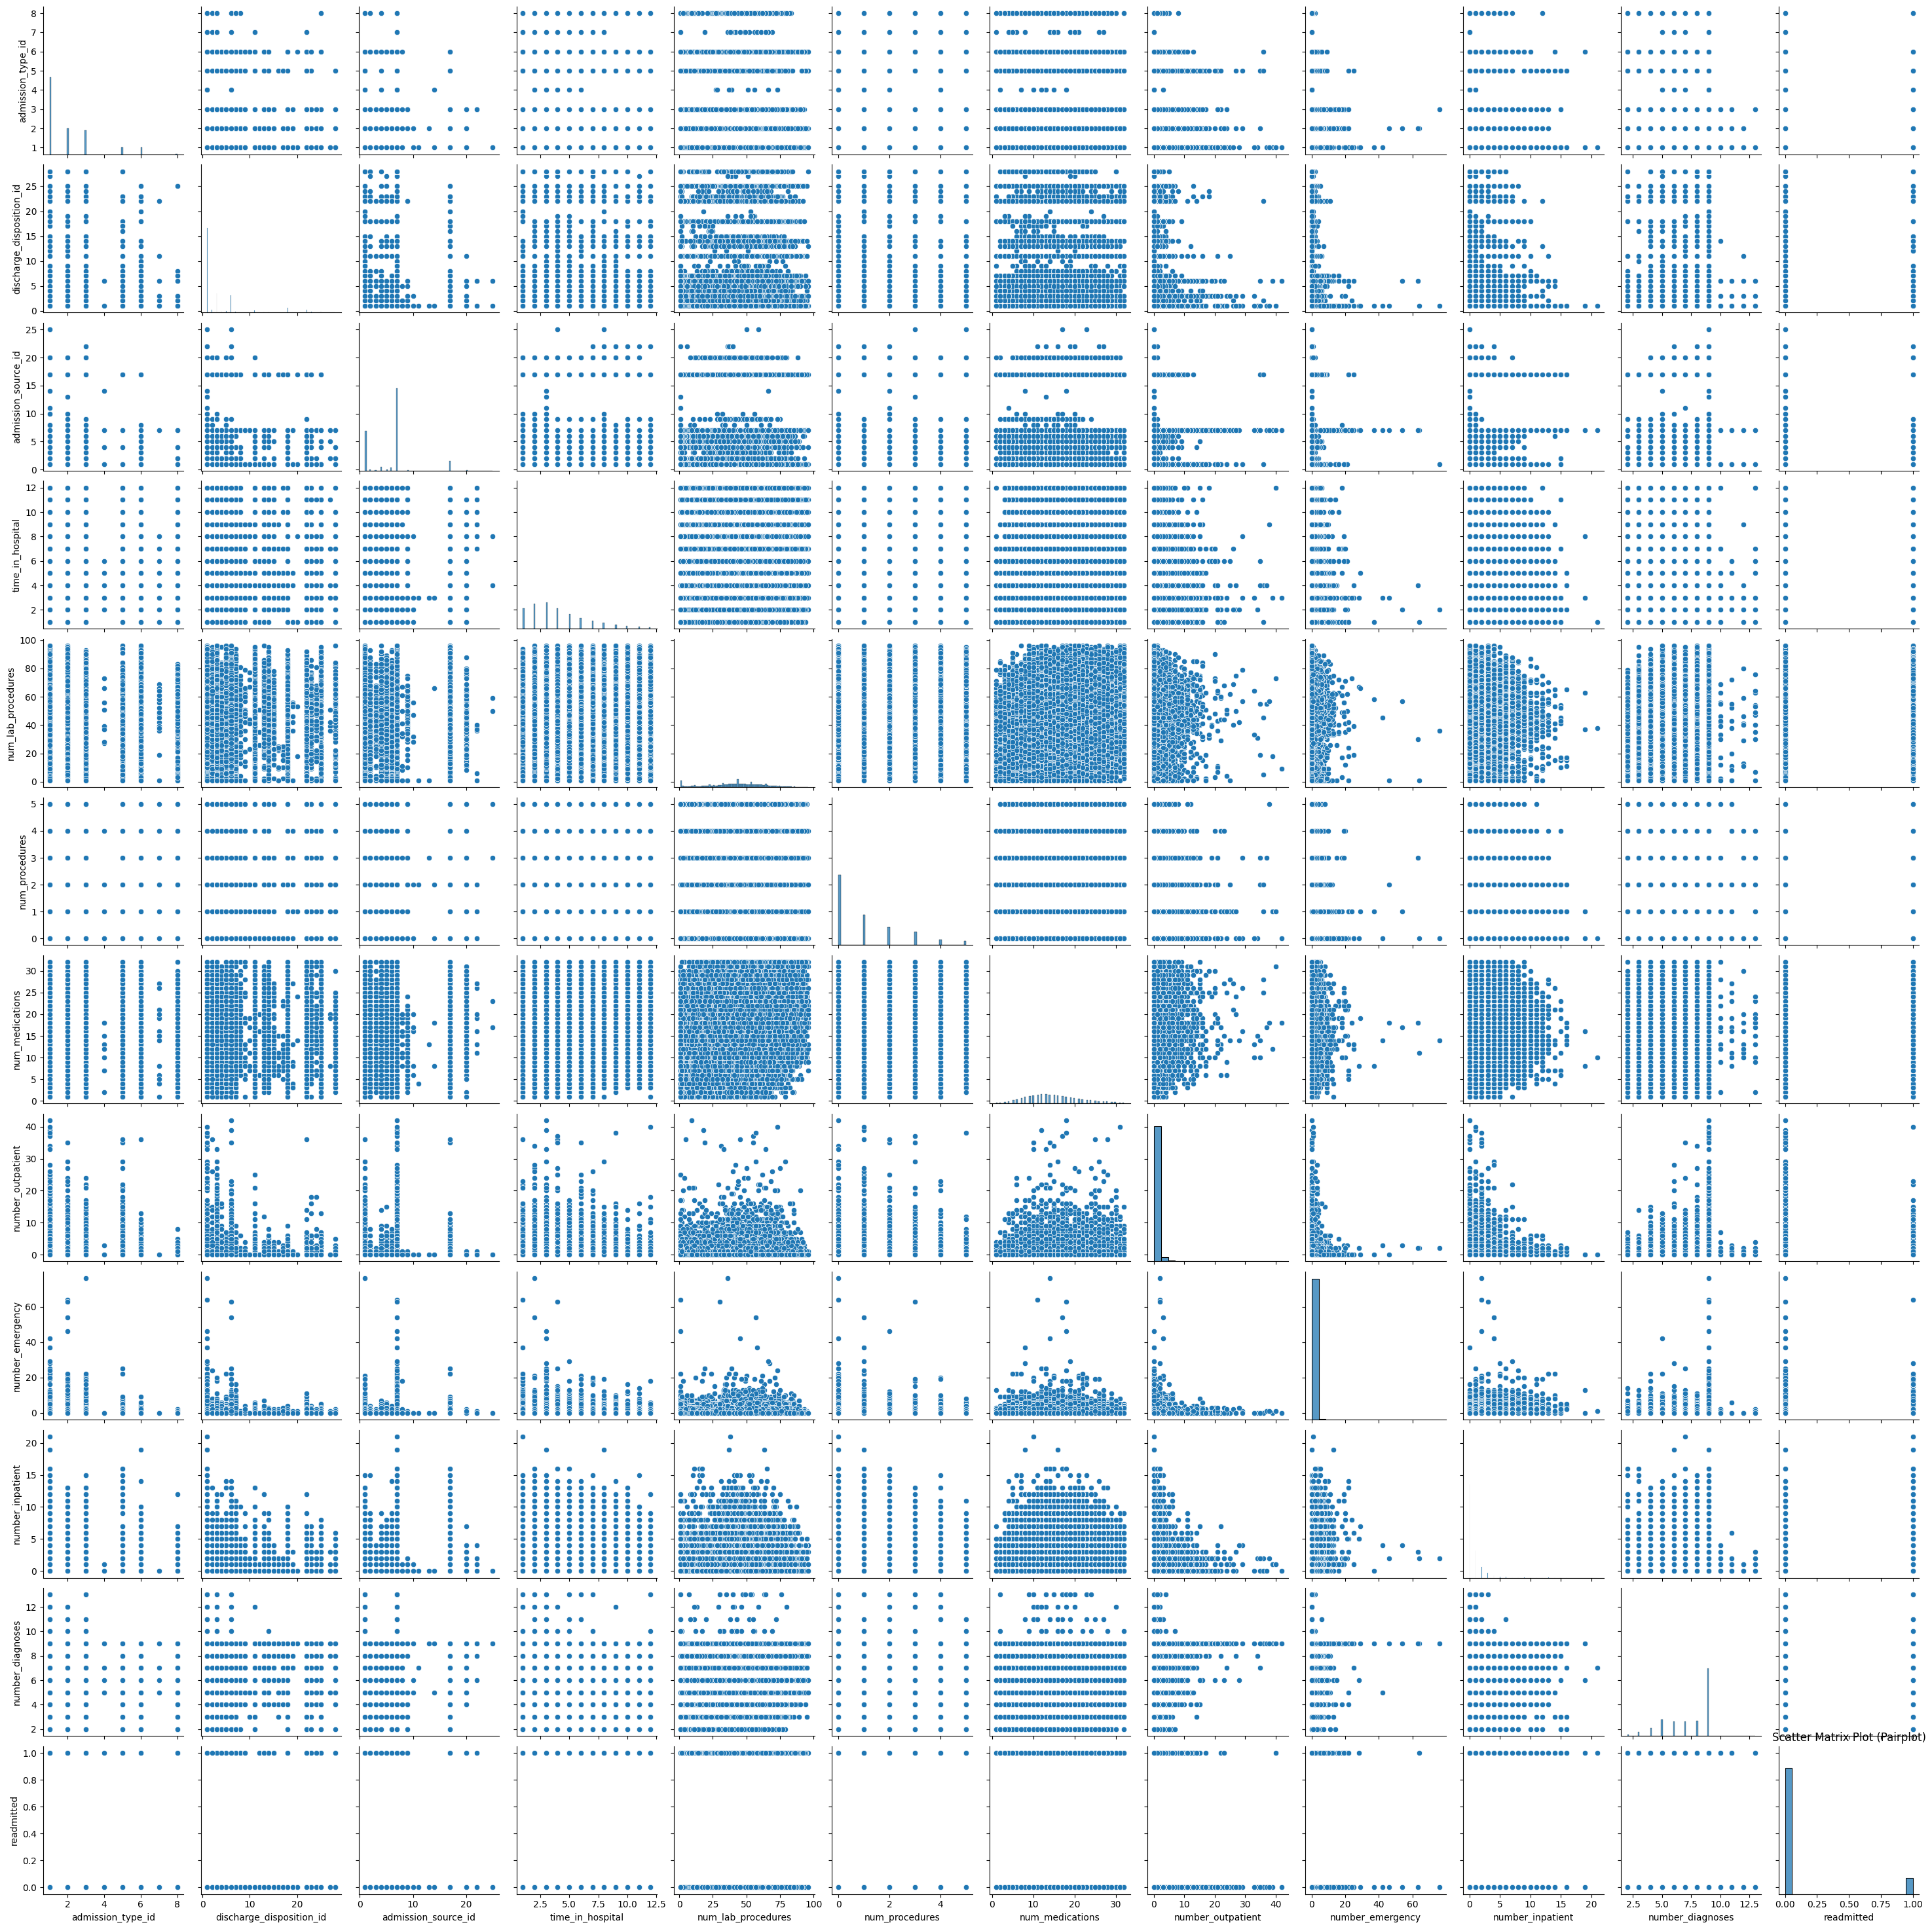

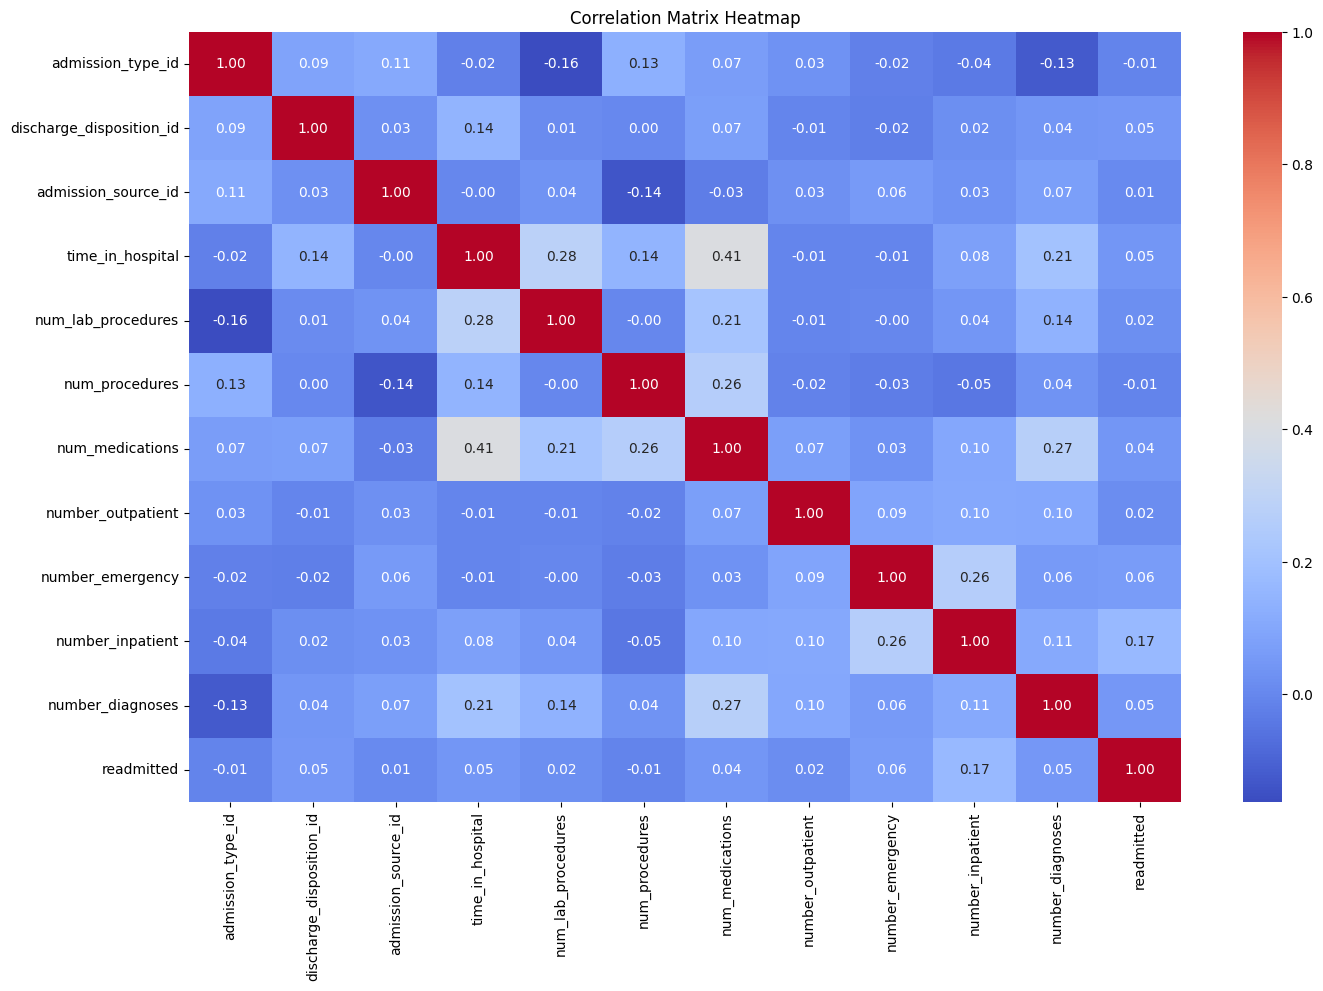

In [27]:
import seaborn as sns
sns.pairplot(df2_no_outliers)
plt.title('Scatter Matrix Plot (Pairplot)')
plt.show()

correlation_matrix = df2_no_outliers.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
# Normalizing
col_to_normalize = ['number_inpatient','num_medications','num_procedures','num_lab_procedures','time_in_hospital','number_diagnoses','number_outpatient','number_emergency']

def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())
df2_no_outliers[col_to_normalize] = df2_no_outliers[col_to_normalize].apply(min_max_scaling)

from IPython.display import display
display(df2_no_outliers.head(10))

race  gender       age  admission_type_id  \
1         Caucasian  Female   [10-20)                  1   
2   AfricanAmerican  Female   [20-30)                  1   
3         Caucasian    Male   [30-40)                  1   
4         Caucasian    Male   [40-50)                  1   
6         Caucasian    Male   [60-70)                  3   
7         Caucasian    Male   [70-80)                  1   
9         Caucasian  Female  [90-100)                  3   
10  AfricanAmerican  Female   [40-50)                  1   
11  AfricanAmerican    Male   [60-70)                  2   
12        Caucasian  Female   [40-50)                  1   

    discharge_disposition_id  admission_source_id  time_in_hospital  \
1                          1                    7          0.181818   
2                          1                    7          0.090909   
3                          1                    7          0.090909   
4                          1                    7          0.000000   
6                          1                    2          0.272727   
7                          1                    7          0.363636   
9                          3                    4          1.000000   
10                         1                    7          0.727273   
11                         1                    4          0.545455   
12                         3                    7          0.545455   

   payer_code       medical_specialty  num_lab_procedures  ...  metformin  \
1          MC        InternalMedicine            0.610526  ...         No   
2          MC        InternalMedicine            0.105263  ...         No   
3          MC        InternalMedicine            0.452632  ...         No   
4          MC        InternalMedicine            0.526316  ...         No   
6          MC        InternalMedicine            0.726316  ...     Steady   
7          MC        InternalMedicine            0.757895  ...         No   
9          MC        InternalMedicine            0.336842  ...         No   
10         MC  Family/GeneralPractice            0.484211  ...         No   
11         MC  Family/GeneralPractice            0.642105  ...         No   
12         MC  Family/GeneralPractice            0.621053  ...     Steady   

    glimepiride  glipizide  glyburide  pioglitazone rosiglitazone insulin  \
1            No         No         No            No            No      Up   
2            No     Steady         No            No            No      No   
3            No         No         No            No            No      Up   
4            No     Steady         No            No            No  Steady   
6        Steady         No         No            No            No  Steady   
7            No         No     Steady            No            No      No   
9            No         No         No            No        Steady  Steady   
10           No         No         No            No            No  Steady   
11           No         No         Up            No            No  Steady   
12           No         No         No            No            No    Down   

   change  diabetesMed readmitted  
1      Ch          Yes          0  
2      No          Yes          0  
3      Ch          Yes          0  
4      Ch          Yes          0  
6      Ch          Yes          0  
7      No          Yes          0  
9      Ch          Yes          0  
10     No          Yes          0  
11     Ch          Yes          1  
12     Ch          Yes          1  

[10 rows x 31 columns]

In [29]:
# # Performing necessary encoding to appropriate columns

categorical_cols_forLabelEncoding = ['A1Cresult','max_glu_serum','age']
categorical_cols_forOneHotEncoding = ['medical_specialty','payer_code','admission_type_id','discharge_disposition_id','admission_source_id','glimepiride',
                                      'race','gender','diag_1','diag_2','diag_3','change','insulin','rosiglitazone','pioglitazone','glyburide','glipizide','metformin','diabetesMed']
# Label encoding
for feature in categorical_cols_forLabelEncoding:
    df2_no_outliers[feature] = pd.factorize(df2_no_outliers[feature])[0]

# One-hot encoding
df2_no_outliers = pd.get_dummies(df2_no_outliers, columns=categorical_cols_forOneHotEncoding, drop_first=True)


print('After Encoding shape :',df2_no_outliers.shape)

After Encoding shape : (92092, 2405)


In [30]:
cols_without_specified_dtype = [col for col in df2_no_outliers.columns if df2_no_outliers[col].dtype not in ['int64', 'float64', 'uint8']]

# Print the columns
print("Columns without 'int64', 'float64', or 'uint8' data types:")
if len(cols_without_specified_dtype) > 0:
    for col in cols_without_specified_dtype:
        print(col)
else:
    print("None as all columns have 'int64', 'float64', or 'uint8' data types.")

Columns without 'int64', 'float64', or 'uint8' data types:
None as all columns have 'int64', 'float64', or 'uint8' data types.




---

Plotting Elbow graph to determine the K value to be used for k mean cluster

---



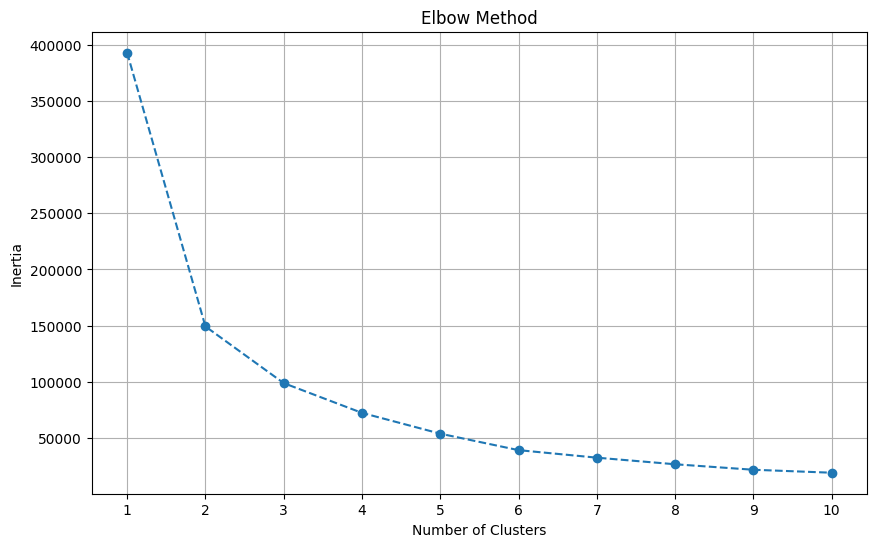

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df2_no_outliers)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [32]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K) from graph
num_clusters = 2

# Apply K-Means algorithm
kmeans = KMeans(n_clusters=num_clusters,n_init=10 ,random_state=33)
cluster_labels = kmeans.fit_predict(df2_no_outliers)

In [33]:
# Assign cluster labels
df2_no_outliers['cluster_label'] = cluster_labels

# Split the data into subsets based on cluster labels
cluster_data = {}
for cluster_label in set(cluster_labels):
    cluster_data[cluster_label] = df2_no_outliers[df2_no_outliers['cluster_label'] == cluster_label]

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

local_classifiers_decision_tree = {}

for cluster_label, cluster_subset in cluster_data.items():
    X_cluster = cluster_subset.drop(columns=['readmitted', 'cluster_label'])
    y_cluster = cluster_subset['readmitted']

    # Split the data into 70% training data and 30% temp data
    # Split the temp data into 50-50 as test and validation data
    # Achieved 70-15-15 split of train, test, and validation
    X_train, X_temp, y_train, y_temp = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=33)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=33)

    # Build up the local classifier as Decision Tree model
    clf_decision_tree = DecisionTreeClassifier(random_state=42)
    clf_decision_tree.fit(X_train, y_train)

    local_classifiers_decision_tree[cluster_label] = clf_decision_tree

print("DECISION TREE")
print("-"*100)
# Performance Metrics on Validation Set
print("Performance Metrics on Validation Set:")
for cluster_label, clf_decision_tree in local_classifiers_decision_tree.items():
    X_cluster_val = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_val = cluster_data[cluster_label]['readmitted']
    y_pred_val = clf_decision_tree.predict(X_cluster_val)

    accuracy = accuracy_score(y_cluster_val, y_pred_val)
    precision = precision_score(y_cluster_val, y_pred_val)
    recall = recall_score(y_cluster_val, y_pred_val)
    f1 = f1_score(y_cluster_val, y_pred_val)
    roc_auc = roc_auc_score(y_cluster_val, y_pred_val)
    support = np.sum(y_pred_val == y_cluster_val)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()

# Performance Metrics on Test Set
print("Performance Metrics on Test Set:")
for cluster_label, clf_decision_tree in local_classifiers_decision_tree.items():
    X_cluster_test = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_test = cluster_data[cluster_label]['readmitted']
    y_pred_test = clf_decision_tree.predict(X_cluster_test)

    accuracy = accuracy_score(y_cluster_test, y_pred_test)
    precision = precision_score(y_cluster_test, y_pred_test)
    recall = recall_score(y_cluster_test, y_pred_test)
    f1 = f1_score(y_cluster_test, y_pred_test)
    roc_auc = roc_auc_score(y_cluster_test, y_pred_test)
    support = np.sum(y_pred_test == y_cluster_test)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()


DECISION TREE
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Cluster 0:
Accuracy %: 94.61565037139403
Precision: 0.773145212428662
Recall: 0.743105287216212
F1 Score: 0.7578276746173569
ROC AUC Score: 0.8576126120457704
Support: 54773

Cluster 1:
Accuracy %: 94.5149406467458
Precision: 0.7612066535100085
Recall: 0.7240547063555913
F1 Score: 0.7421660252886201
ROC AUC Score: 0.8481298045281713
Support: 32326

Performance Metrics on Test Set:
Cluster 0:
Accuracy %: 94.61565037139403
Precision: 0.773145212428662
Recall: 0.743105287216212
F1 Score: 0.7578276746173569
ROC AUC Score: 0.8576126120457704
Support: 54773

Cluster 1:
Accuracy %: 94.5149406467458
Precision: 0.7612066535100085
Recall: 0.7240547063555913
F1 Score: 0.7421660252886201
ROC AUC Score: 0.8481298045281713
Support: 32326



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

local_classifiers_random_forest = {}

for cluster_label, cluster_subset in cluster_data.items():
    X_cluster = cluster_subset.drop(columns=['readmitted', 'cluster_label'])
    y_cluster = cluster_subset['readmitted']

    X_train, X_temp, y_train, y_temp = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=33)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=33)

    # Build up the local classifier as Random Forest model
    clf_random_forest = RandomForestClassifier(random_state=42)
    clf_random_forest.fit(X_train, y_train)

    local_classifiers_random_forest[cluster_label] = clf_random_forest

print("RANDOM FOREST")
print("-"*100)
# Performance Metrics on Validation Set
print("Performance Metrics on Validation Set:")
for cluster_label, clf_random_forest in local_classifiers_random_forest.items():
    X_cluster_val = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_val = cluster_data[cluster_label]['readmitted']
    y_pred_val = clf_random_forest.predict(X_cluster_val)

    accuracy = accuracy_score(y_cluster_val, y_pred_val)
    precision = precision_score(y_cluster_val, y_pred_val)
    recall = recall_score(y_cluster_val, y_pred_val)
    f1 = f1_score(y_cluster_val, y_pred_val)
    roc_auc = roc_auc_score(y_cluster_val, y_pred_val)
    support = np.sum(y_pred_val == y_cluster_val)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()

# Performance Metrics on Test Set
print("Performance Metrics on Test Set:")
for cluster_label, clf_random_forest in local_classifiers_random_forest.items():
    X_cluster_test = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_test = cluster_data[cluster_label]['readmitted']
    y_pred_test = clf_random_forest.predict(X_cluster_test)

    accuracy = accuracy_score(y_cluster_test, y_pred_test)
    precision = precision_score(y_cluster_test, y_pred_test)
    recall = recall_score(y_cluster_test, y_pred_test)
    f1 = f1_score(y_cluster_test, y_pred_test)
    roc_auc = roc_auc_score(y_cluster_test, y_pred_test)
    support = np.sum(y_pred_test == y_cluster_test)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()


RANDOM FOREST
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Cluster 0:
Accuracy %: 96.62636033857316
Precision: 0.9989177489177489
Recall: 0.7031845192747219
F1 Score: 0.8253599213091298
ROC AUC Score: 0.8515435523293164
Support: 55937

Cluster 1:
Accuracy %: 96.47389041576517
Precision: 0.9996039603960396
Recall: 0.6768570662375972
F1 Score: 0.8071634154141349
ROC AUC Score: 0.8384121251510895
Support: 32996

Performance Metrics on Test Set:
Cluster 0:
Accuracy %: 96.62636033857316
Precision: 0.9989177489177489
Recall: 0.7031845192747219
F1 Score: 0.8253599213091298
ROC AUC Score: 0.8515435523293164
Support: 55937

Cluster 1:
Accuracy %: 96.47389041576517
Precision: 0.9996039603960396
Recall: 0.6768570662375972
F1 Score: 0.8071634154141349
ROC AUC Score: 0.8384121251510895
Support: 32996



In [36]:
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

local_classifiers1 = {}

for cluster_label, cluster_subset in cluster_data.items():
    X_cluster = cluster_subset.drop(columns=['readmitted', 'cluster_label'])
    y_cluster = cluster_subset['readmitted']

    X_train, X_temp, y_train, y_temp = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=33)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=33)

    # Build up the local classifier as Logistic Regression model
    clf_local = linear_model.LogisticRegression(max_iter=10000)
    clf_local.fit(X_train, y_train)

    local_classifiers1[cluster_label] = clf_local
print("LOGISTIC REGRESSION MODEL")
print("-"*100)
# Evaluate the performance of each local classifier on the validation set
print("Performance Metrics on Validation Set:")
for cluster_label, clf_local in local_classifiers1.items():
    X_cluster_val = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_val = cluster_data[cluster_label]['readmitted']
    y_pred_val = clf_local.predict(X_cluster_val)

    accuracy = accuracy_score(y_cluster_val, y_pred_val)
    precision = precision_score(y_cluster_val, y_pred_val)
    recall = recall_score(y_cluster_val, y_pred_val)
    f1 = f1_score(y_cluster_val, y_pred_val)
    roc_auc = roc_auc_score(y_cluster_val, y_pred_val)
    support = np.sum(y_pred_val == y_cluster_val)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()

# Evaluate the performance of each local classifier on the test set
print("Performance Metrics on Test Set:")
for cluster_label, clf_local in local_classifiers1.items():
    X_cluster_test = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_test = cluster_data[cluster_label]['readmitted']
    y_pred_test = clf_local.predict(X_cluster_test)

    accuracy = accuracy_score(y_cluster_test, y_pred_test)
    precision = precision_score(y_cluster_test, y_pred_test)
    recall = recall_score(y_cluster_test, y_pred_test)
    f1 = f1_score(y_cluster_test, y_pred_test)
    roc_auc = roc_auc_score(y_cluster_test, y_pred_test)
    support = np.sum(y_pred_test == y_cluster_test)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()


LOGISTIC REGRESSION MODEL
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Cluster 0:
Accuracy %: 88.6923475557091
Precision: 0.5224274406332454
Recall: 0.030169129971049823
F1 Score: 0.05704407951598963
ROC AUC Score: 0.513321360434314
Support: 51344

Cluster 1:
Accuracy %: 89.14098590725689
Precision: 0.5572519083969466
Recall: 0.0195762939125771
F1 Score: 0.0378238341968912
ROC AUC Score: 0.5088364848291597
Support: 30488

Performance Metrics on Test Set:
Cluster 0:
Accuracy %: 88.6923475557091
Precision: 0.5224274406332454
Recall: 0.030169129971049823
F1 Score: 0.05704407951598963
ROC AUC Score: 0.513321360434314
Support: 51344

Cluster 1:
Accuracy %: 89.14098590725689
Precision: 0.5572519083969466
Recall: 0.0195762939125771
F1 Score: 0.0378238341968912
ROC AUC Score: 0.5088364848291597
Support: 30488



Since we had the liberty to choose which ever model we want to use , Logistic regression , decision tree and random forest model are tried here, since all of these models performing well , we will balance the data and perform the evaluation of Logistic regression model for better comparision with part-1 as it was used in that part also.

In [37]:
from imblearn.over_sampling import RandomOverSampler
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

local_classifiers1 = {}

# Balancing the data using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

for cluster_label, cluster_subset in cluster_data.items():
    X_cluster = cluster_subset.drop(columns=['readmitted', 'cluster_label'])
    y_cluster = cluster_subset['readmitted']

    # Oversample the minority class
    X_resampled, y_resampled = oversampler.fit_resample(X_cluster, y_cluster)

    X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=33)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=33)

    # Build up the local classifier as Logistic Regression model
    clf_local = linear_model.LogisticRegression(max_iter=10000)
    clf_local.fit(X_train, y_train)

    local_classifiers1[cluster_label] = clf_local

print("LOGISTIC REGRESSION MODEL after Oversampling")
print("-"*100)

# Evaluate the performance of each local classifier on the validation set
print("Performance Metrics on Validation Set:")
for cluster_label, clf_local in local_classifiers1.items():
    X_cluster_val = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_val = cluster_data[cluster_label]['readmitted']
    y_pred_val = clf_local.predict(X_cluster_val)

    accuracy = accuracy_score(y_cluster_val, y_pred_val)
    precision = precision_score(y_cluster_val, y_pred_val)
    recall = recall_score(y_cluster_val, y_pred_val)
    f1 = f1_score(y_cluster_val, y_pred_val)
    roc_auc = roc_auc_score(y_cluster_val, y_pred_val)
    support = np.sum(y_pred_val == y_cluster_val)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()

# Evaluate the performance of each local classifier on the test set
print("Performance Metrics on Test Set:")
for cluster_label, clf_local in local_classifiers1.items():
    X_cluster_test = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_test = cluster_data[cluster_label]['readmitted']
    y_pred_test = clf_local.predict(X_cluster_test)

    accuracy = accuracy_score(y_cluster_test, y_pred_test)
    precision = precision_score(y_cluster_test, y_pred_test)
    recall = recall_score(y_cluster_test, y_pred_test)
    f1 = f1_score(y_cluster_test, y_pred_test)
    roc_auc = roc_auc_score(y_cluster_test, y_pred_test)
    support = np.sum(y_pred_test == y_cluster_test)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()


LOGISTIC REGRESSION MODEL after Oversampling
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Cluster 0:
Accuracy %: 68.48160304024876
Precision: 0.20968142736444512
Recall: 0.6428462593326223
F1 Score: 0.3162194573527207
ROC AUC Score: 0.6665144071615865
Support: 39644

Cluster 1:
Accuracy %: 67.59546225366938
Precision: 0.20192931258106356
Recall: 0.6680075087154733
F1 Score: 0.3101151571739807
ROC AUC Score: 0.6724673122614547
Support: 23119

Performance Metrics on Test Set:
Cluster 0:
Accuracy %: 68.48160304024876
Precision: 0.20968142736444512
Recall: 0.6428462593326223
F1 Score: 0.3162194573527207
ROC AUC Score: 0.6665144071615865
Support: 39644

Cluster 1:
Accuracy %: 67.59546225366938
Precision: 0.20192931258106356
Recall: 0.6680075087154733
F1 Score: 0.3101151571739807
ROC AUC Score: 0.6724673122614547
Support: 23119



In [38]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

local_classifiers1 = {}

# Undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

for cluster_label, cluster_subset in cluster_data.items():
    X_cluster = cluster_subset.drop(columns=['readmitted', 'cluster_label'])
    y_cluster = cluster_subset['readmitted']

    # Undersample the majority class
    X_resampled, y_resampled = rus.fit_resample(X_cluster, y_cluster)

    X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=33)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=33)

    # Build up the local classifier as Logistic Regression model
    clf_local = linear_model.LogisticRegression(max_iter=10000)
    clf_local.fit(X_train, y_train)

    local_classifiers1[cluster_label] = clf_local

print("LOGISTIC REGRESSION MODEL after Undersampling")
print("-"*100)

# Evaluate the performance of each local classifier on the validation set
print("Performance Metrics on Validation Set:")
for cluster_label, clf_local in local_classifiers1.items():
    X_cluster_val = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_val = cluster_data[cluster_label]['readmitted']
    y_pred_val = clf_local.predict(X_cluster_val)

    accuracy = accuracy_score(y_cluster_val, y_pred_val)
    precision = precision_score(y_cluster_val, y_pred_val)
    recall = recall_score(y_cluster_val, y_pred_val)
    f1 = f1_score(y_cluster_val, y_pred_val)
    roc_auc = roc_auc_score(y_cluster_val, y_pred_val)
    support = np.sum(y_pred_val == y_cluster_val)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()

# Evaluate the performance of each local classifier on the test set
print("Performance Metrics on Test Set:")
for cluster_label, clf_local in local_classifiers1.items():
    X_cluster_test = cluster_data[cluster_label].drop(columns=['readmitted', 'cluster_label'])
    y_cluster_test = cluster_data[cluster_label]['readmitted']
    y_pred_test = clf_local.predict(X_cluster_test)

    accuracy = accuracy_score(y_cluster_test, y_pred_test)
    precision = precision_score(y_cluster_test, y_pred_test)
    recall = recall_score(y_cluster_test, y_pred_test)
    f1 = f1_score(y_cluster_test, y_pred_test)
    roc_auc = roc_auc_score(y_cluster_test, y_pred_test)
    support = np.sum(y_pred_test == y_cluster_test)

    print(f"Cluster {cluster_label}:")
    print(f"Accuracy %: {accuracy * 100}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Support: {support}")
    print()


LOGISTIC REGRESSION MODEL after Undersampling
----------------------------------------------------------------------------------------------------
Performance Metrics on Validation Set:
Cluster 0:
Accuracy %: 62.87096216963206
Precision: 0.18424057860677578
Recall: 0.6637208593630961
F1 Score: 0.2884195193008012
ROC AUC Score: 0.6439768596306976
Support: 36396

Cluster 1:
Accuracy %: 60.780071340857255
Precision: 0.16916034706565553
Recall: 0.6639849825690534
F1 Score: 0.2696286616574104
ROC AUC Score: 0.6324551959739239
Support: 20788

Performance Metrics on Test Set:
Cluster 0:
Accuracy %: 62.87096216963206
Precision: 0.18424057860677578
Recall: 0.6637208593630961
F1 Score: 0.2884195193008012
ROC AUC Score: 0.6439768596306976
Support: 36396

Cluster 1:
Accuracy %: 60.780071340857255
Precision: 0.16916034706565553
Recall: 0.6639849825690534
F1 Score: 0.2696286616574104
ROC AUC Score: 0.6324551959739239
Support: 20788

